In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from tqdm import tqdm
import pickle
from sparrow import Protein
import protfasta
import metapredict as meta
from scipy.signal import convolve2d

import metapredict as meta

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sparrow import Protein

from finches import Mpipi_frontend
from finches.frontend import interlogo
mf = Mpipi_frontend()


In [2]:
from finches.domain_decomposition import domain_analysis

## Fig. 4E
Note we generate two intermaps with two different domains identified, and then combine them using Illustrator for the final figure.

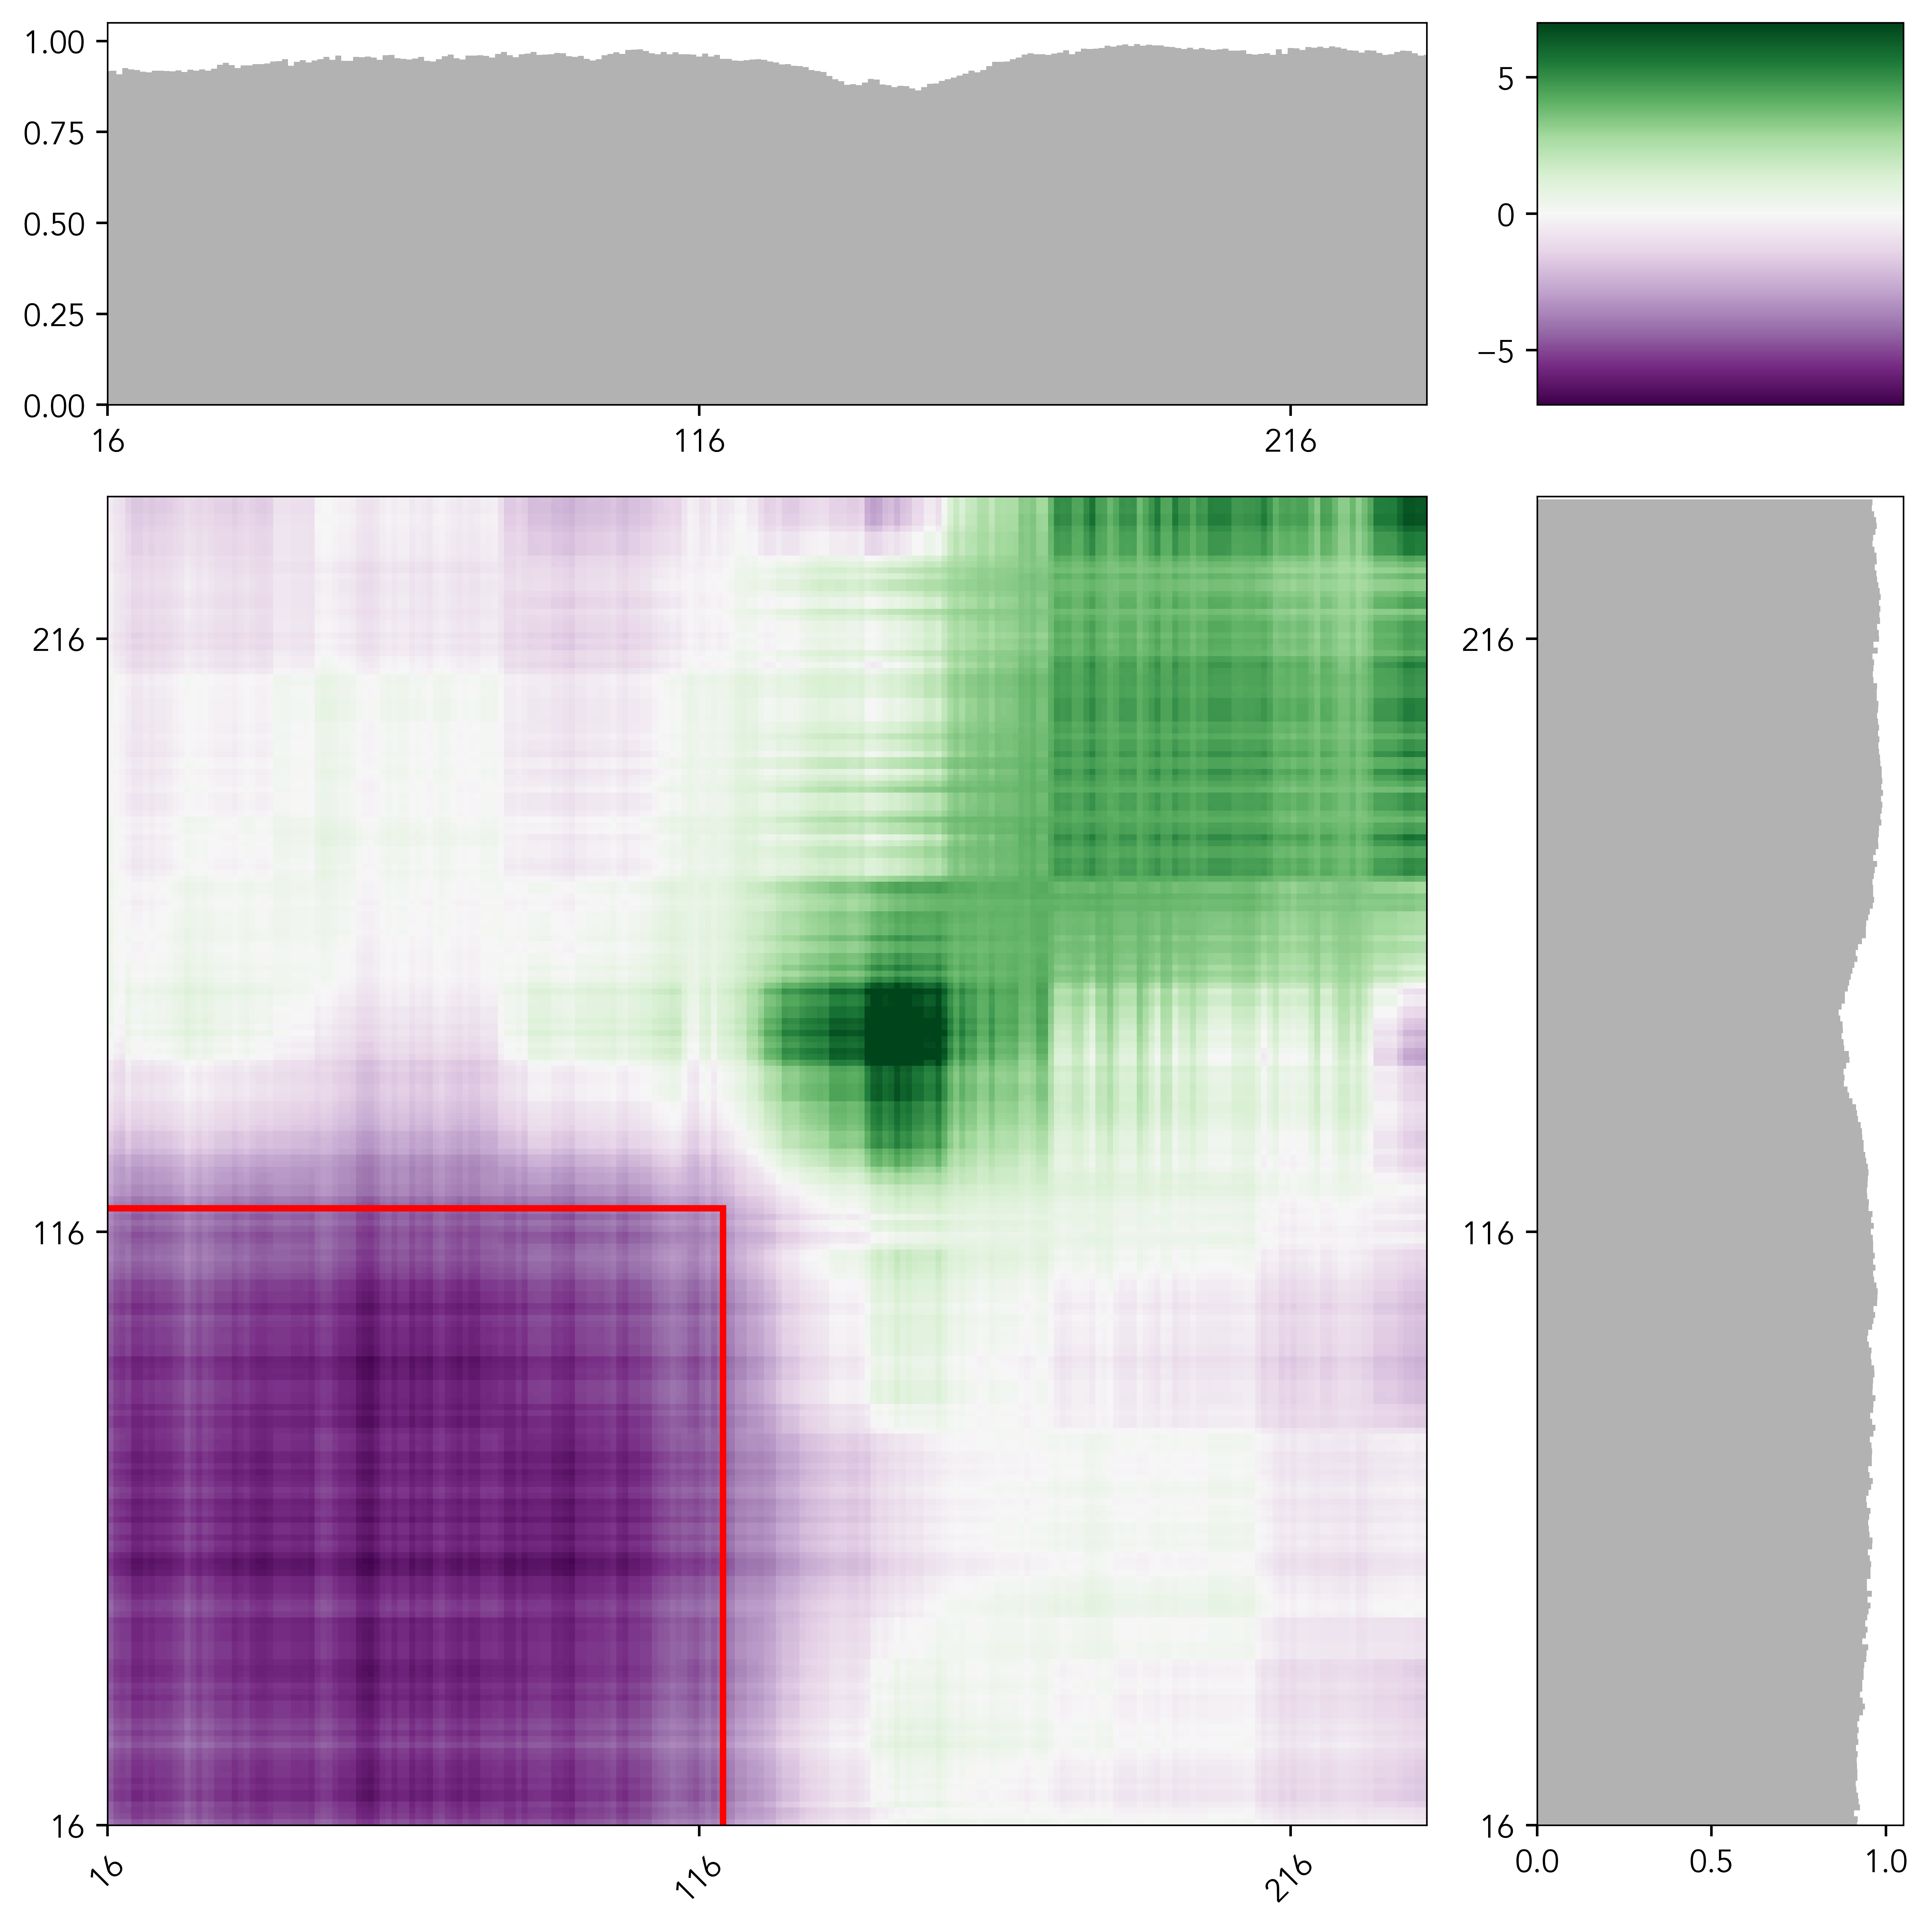

In [3]:
sup35 = 'MSDSNQGNNQQNYQQYSQNGNQQQGNNRYQGYQAYNAQAQPAGGYYQNYQGYSGYQQGGYQQYNPDAGYQQQYNPQGGYQQYNPQGGYQQQFNPQGGRGNYKNFNYNNNLQGYQAGFQPQSQGMSLNDFQKQQKQAAPKPKKTLKLVSSSGIKLANATKKVGTKPAESDKKEEEKSAETKEPTKEPTKVEEPVKKEEKPVQTEEKTEEKSELPKVEDLKISESTHNTNNANVTSADALIKEQEEEVDDEVVNDMFGGKDHVSLIFMGHVDAGKSTMGGNLLYLTGSVDKRTIEKYEREAKDAGRQGWYLSWVMDTNKEERNDGKTIEVGKAYFETEKRRYTILDAPGHKMYVSEMIGGASQADVGVLVISARKGEYETGFERGGQTREHALLAKTQGVNKMVVVVNKMDDPTVNWSKERYDQCVSNVSNFLRAIGYNIKTDVVFMPVSGYSGANLKDHVDPKECPWYTGPTLLEYLDTMNHVDRHINAPFMLPIAAKMKDLGTIVEGKIESGHIKKGQSTLLMPNKTAVEIQNIYNETENEVDMAMCGEQVKLRIKGVEEEDISPGFVLTSPKNPIKSVTKFVAQIAIVELKSIIAAGFSCVMHVHTAIEEVHIVKLLHKLEKGTNRKSKKPPAFAKKGMKVIAVLETEAPVCVETYQDYPQLGRFTLRDQGTTIAIGKIVKIAE'
idr1 = meta.predict_disorder_domains(sup35).disordered_domains[0]


[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, idr1, idr1, criteria_threshold=-4)
mf.interaction_figure(idr1, idr1, plot_rectangles=[i.rectangle_info for i in interactor_pairs],zero_folded=False, vmin=-7, vmax=7, fname='out_figures/sup35_N_identified.pdf')
i = interactor_pairs[0]
print(i.r1_sequence_full)

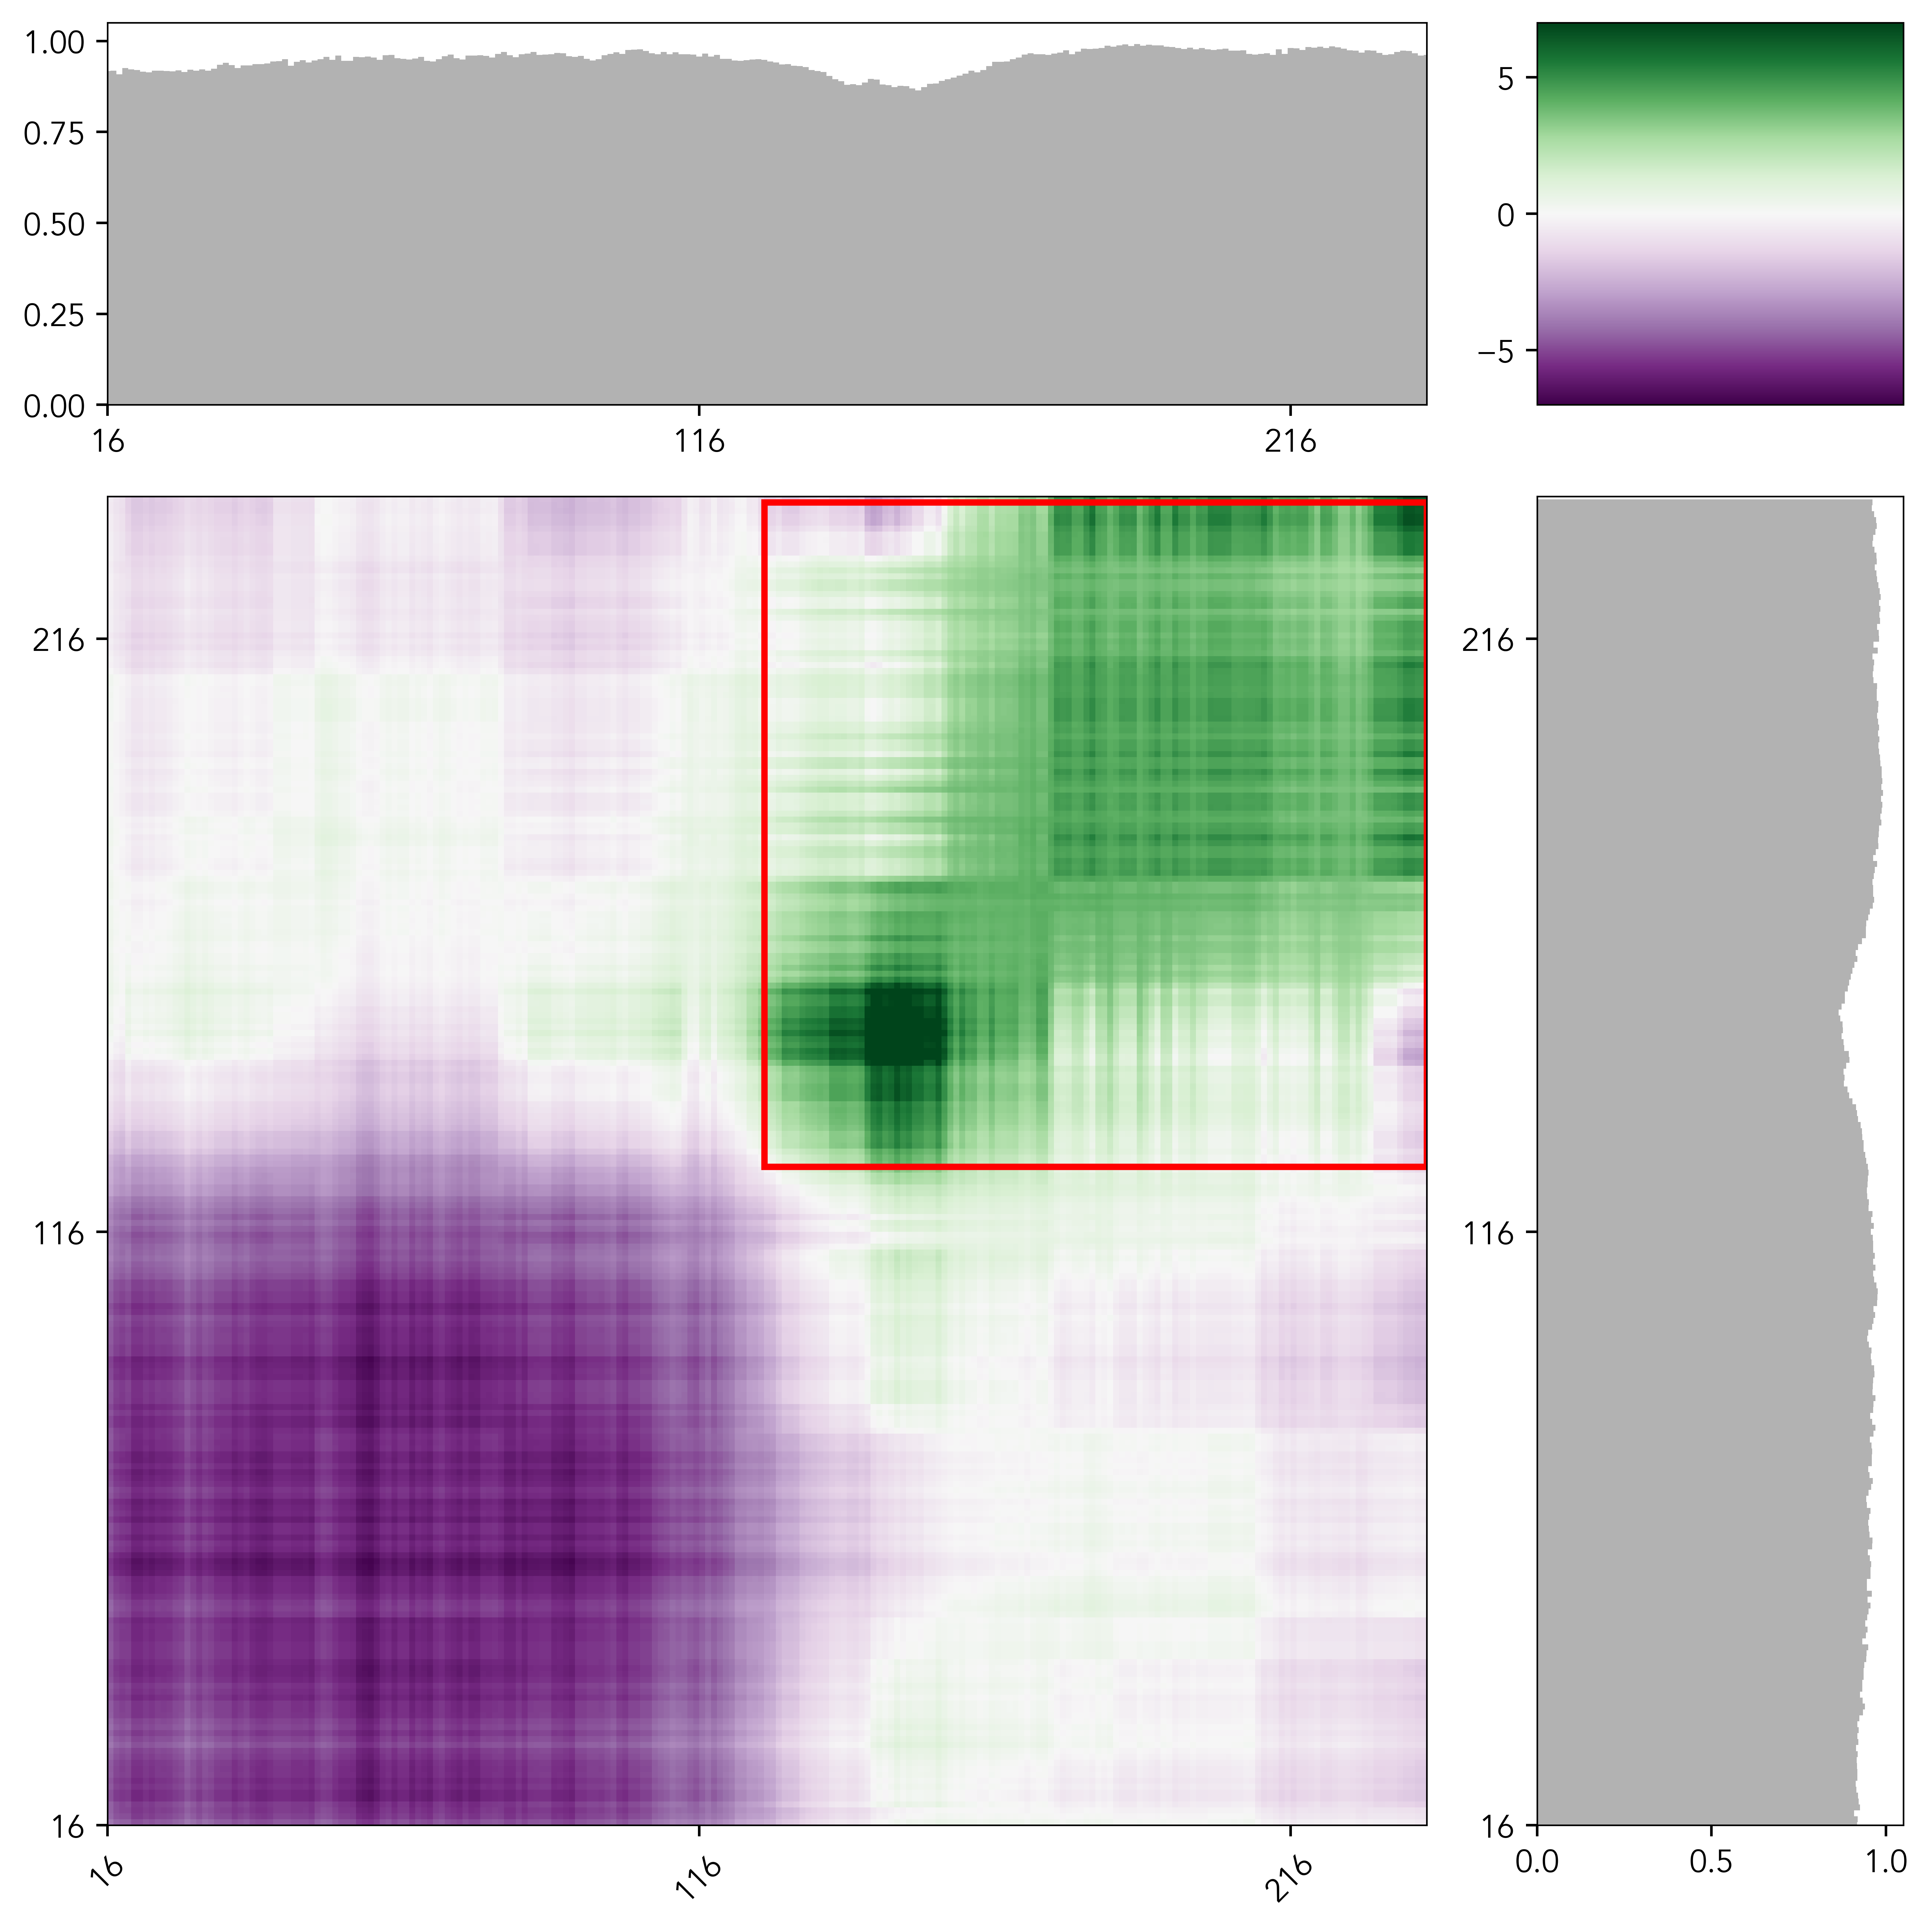

In [4]:
[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, idr1, idr1, criteria_threshold=2.2, criteria='greater')
mf.interaction_figure(idr1, idr1, plot_rectangles=[i.rectangle_info for i in interactor_pairs],zero_folded=False, vmin=-7, vmax=7, fname='out_figures/sup35_M_identified.pdf')
i = interactor_pairs[0]
Protein(i.r1_sequence_full).show_sequence(blocksize=100)

## Fig. 4F BRCA2 intermap
The code below generates the 'raw' BRCA2$^{201-400}$ intermap

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

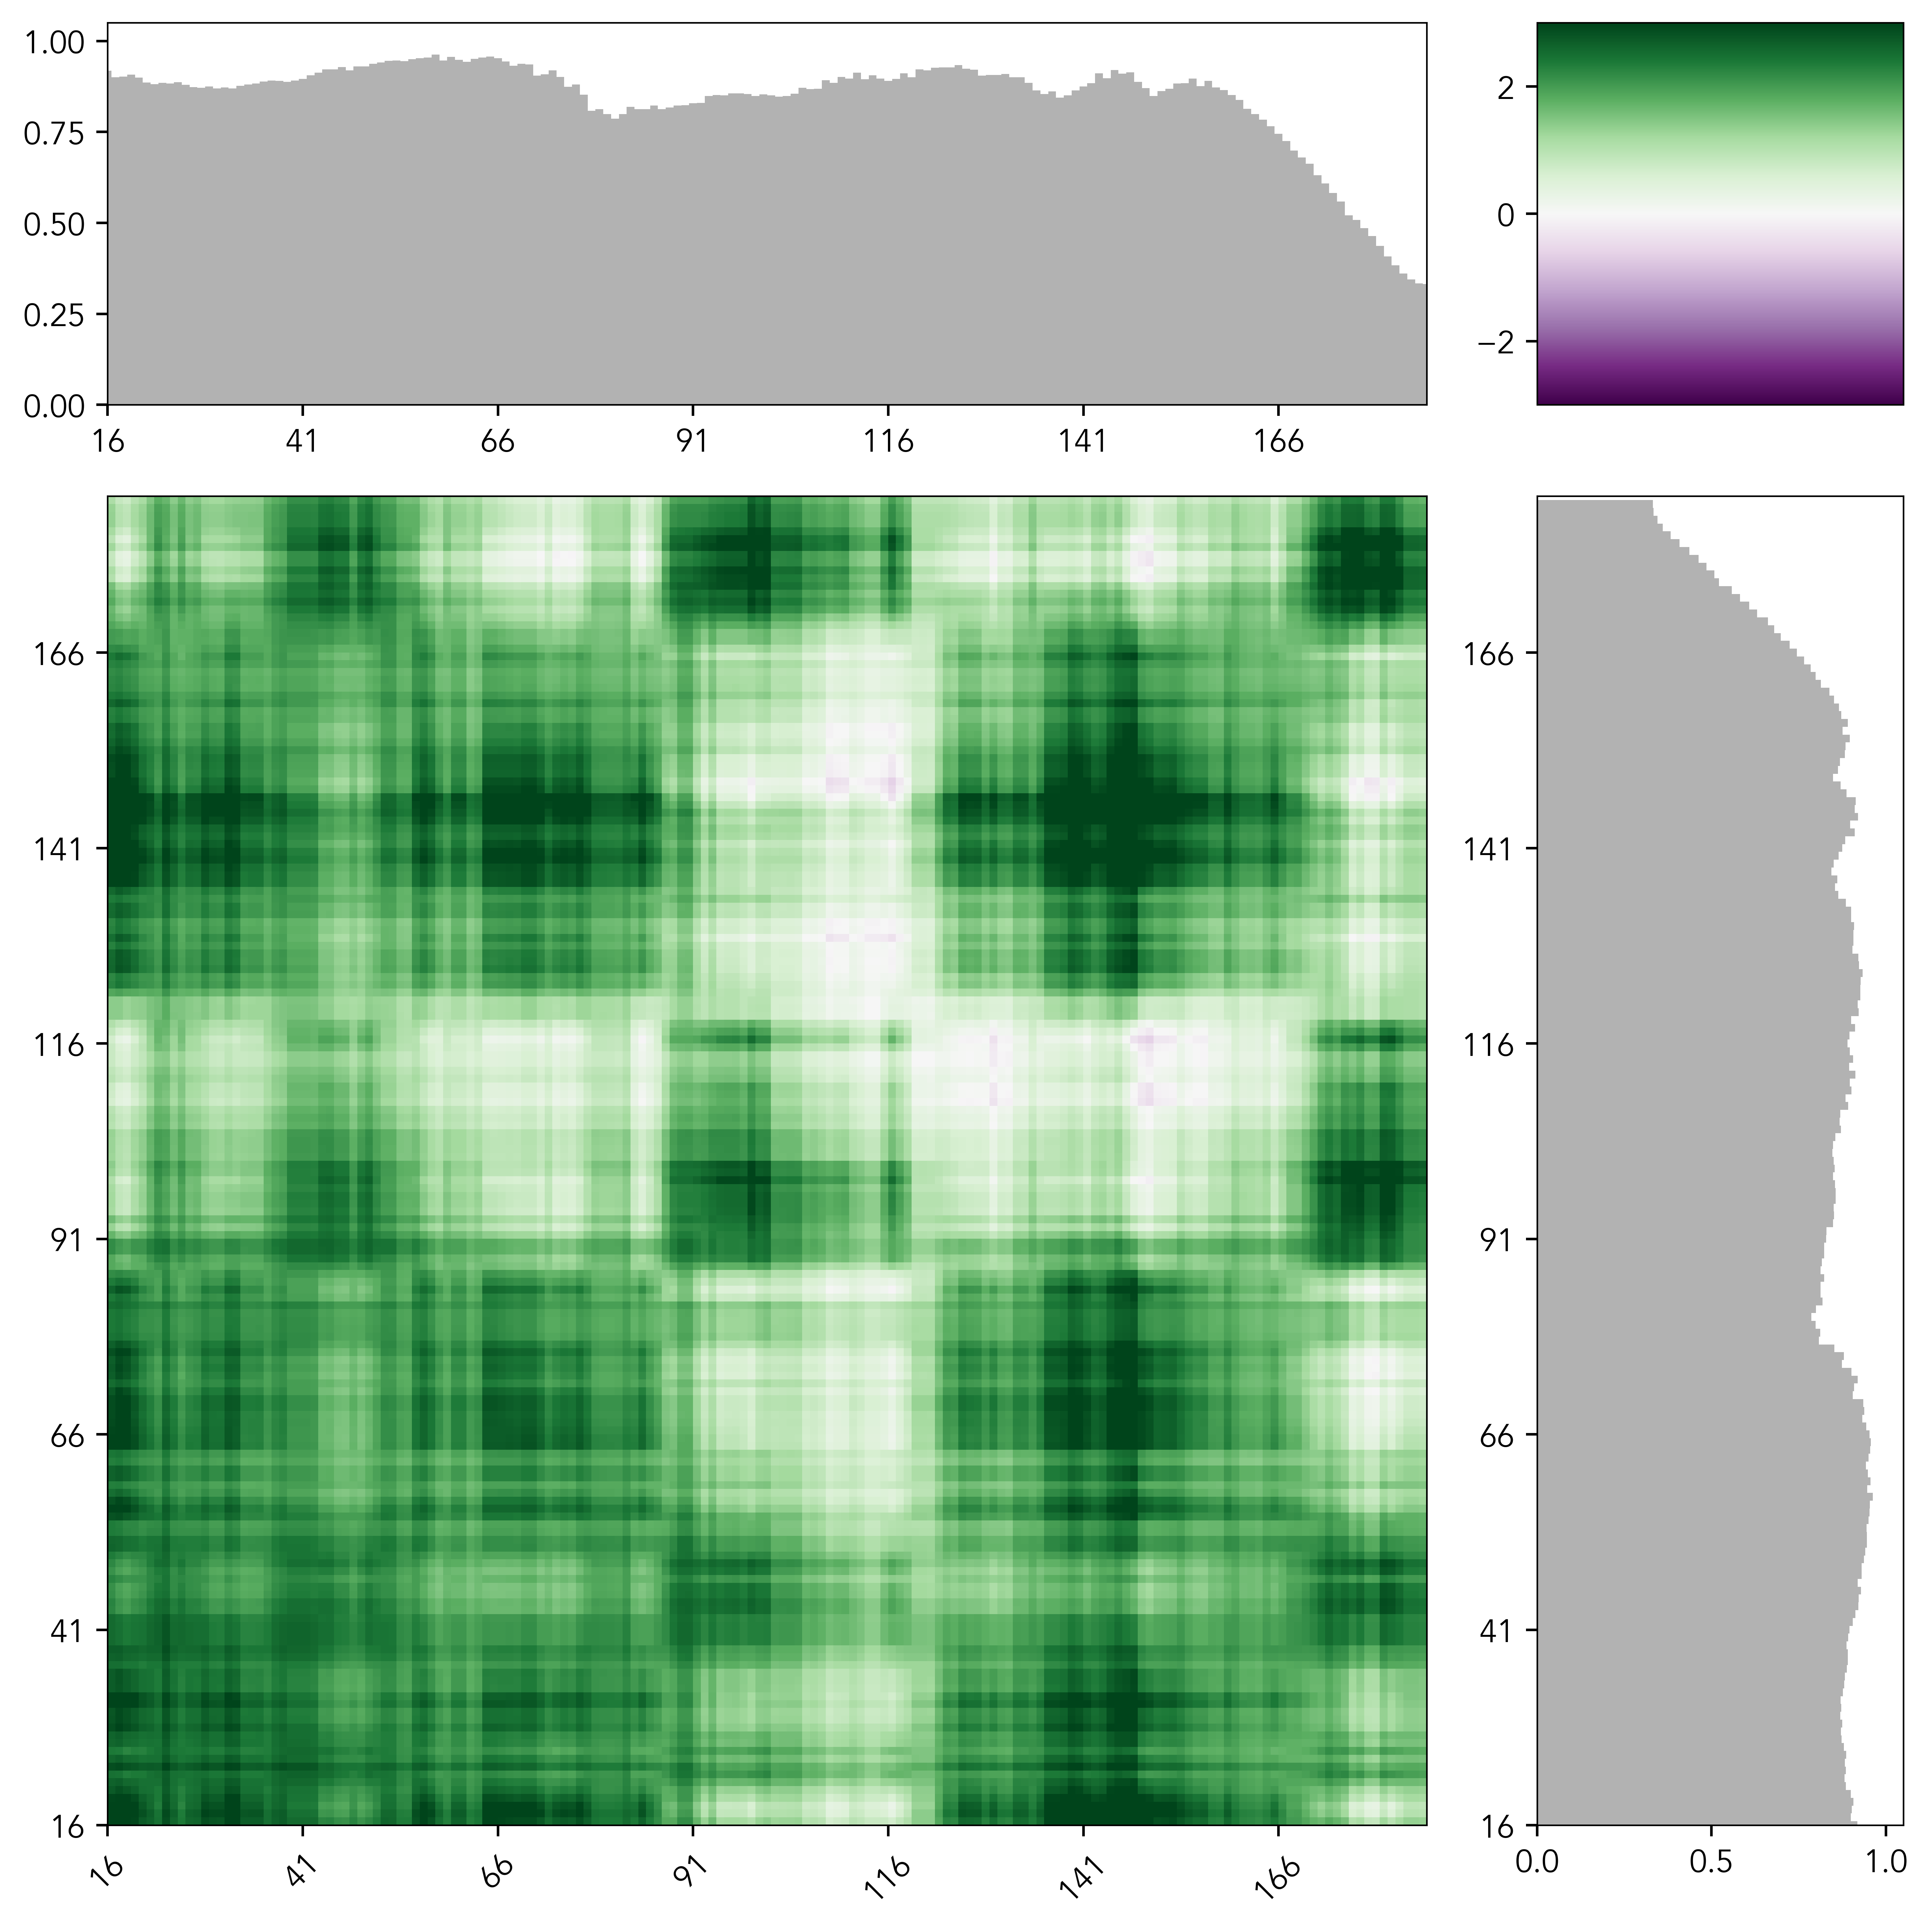

In [6]:
# define the 'empty' 
brca2 = 'MPIGSKERPTFFEIFKTRCNKADLGPISLNWFEELSSEAPPYNSEPAEESEHKNNNYEPNLFKTPQRKPSYNQLASTPIIFKEQGLTLPLYQSPVKELDKFKLDLGRNVPNSRHKSLRTVKTKMDQADDVSCPLLNSCLSESPVVLQCTHVTPQRDKSVVCGSLFHTPKFVKGRQTPKHISESLGAEVDPDMSWSSSLATPPTLSSTVLIVRNEEASETVFPHDTTANVKSYFSNHDESLKKNDRFIASVTDSENTNQREAASHGFGKTSGNSFKVNSCKDHIGKSMPNVLEDEVYETVVDTSEEDSFSLCFSKCRTKNLQKVRTSKTRKKIFHEANADECEKSKNQVKEKYSFVSEVEPNDTDPLDSNVANQKPFESGSDKISKEVVPSLACEWSQLTLSGLNGAQMEKIPLLHISSCDQNISEKDLLDTENKRKKDFLTSENSLPRISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQAISGTSPVASSFQGIKKSIFRIRESPKETFNASFSGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPATTTQNSVALKNAGLISTLKKKTNKFIYAIHDETSYKGKKIPKDQKSELINCSAQFEANAFEAPLTFANADSGLLHSSVKRSCSQNDSEEPTLSLTSSFGTILRKCSRNETCSNNTVISQDLDYKEAKCNKEKLQLFITPEADSLSCLQEGQCENDPKSKKVSDIKEEVLAAACHPVQHSKVEYSDTDFQSQKSLLYDHENASTLILTPTSKDVLSNLVMISRGKESYKMSDKLKGNNYESDVELTKNIPMEKNQDVCALNENYKNVELLPPEKYMRVASPSRKVQFNQNTNLRVIQKNQEETTSISKITVNPDSEELFSDNENNFVFQVANERNNLALGNTKELHETDLTCVNEPIFKNSTMVLYGDTGDKQATQVSIKKDLVYVLAEENKNSVKQHIKMTLGQDLKSDISLNIDKIPEKNNDYMNKWAGLLGPISNHSFGGSFRTASNKEIKLSEHNIKKSKMFFKDIEEQYPTSLACVEIVNTLALDNQKKLSKPQSINTVSAHLQSSVVVSDCKNSHITPQMLFSKQDFNSNHNLTPSQKAEITELSTILEESGSQFEFTQFRKPSYILQKSTFEVPENQMTILKTTSEECRDADLHVIMNAPSIGQVDSSKQFEGTVEIKRKFAGLLKNDCNKSASGYLTDENEVGFRGFYSAHGTKLNVSTEALQKAVKLFSDIENISEETSAEVHPISLSSSKCHDSVVSMFKIENHNDKTVSEKNNKCQLILQNNIEMTTGTFVEEITENYKRNTENEDNKYTAASRNSHNLEFDGSDSSKNDTVCIHKDETDLLFTDQHNICLKLSGQFMKEGNTQIKEDLSDLTFLEVAKAQEACHGNTSNKEQLTATKTEQNIKDFETSDTFFQTASGKNISVAKESFNKIVNFFDQKPEELHNFSLNSELHSDIRKNKMDILSYEETDIVKHKILKESVPVGTGNQLVTFQGQPERDEKIKEPTLLGFHTASGKKVKIAKESLDKVKNLFDEKEQGTSEITSFSHQWAKTLKYREACKDLELACETIEITAAPKCKEMQNSLNNDKNLVSIETVVPPKLLSDNLCRQTENLKTSKSIFLKVKVHENVEKETAKSPATCYTNQSPYSVIENSALAFYTSCSRKTSVSQTSLLEAKKWLREGIFDGQPERINTADYVGNYLYENNSNSTIAENDKNHLSEKQDTYLSNSSMSNSYSYHSDEVYNDSGYLSKNKLDSGIEPVLKNVEDQKNTSFSKVISNVKDANAYPQTVNEDICVEELVTSSSPCKNKNAAIKLSISNSNNFEVGPPAFRIASGKIVCVSHETIKKVKDIFTDSFSKVIKENNENKSKICQTKIMAGCYEALDDSEDILHNSLDNDECSTHSHKVFADIQSEEILQHNQNMSGLEKVSKISPCDVSLETSDICKCSIGKLHKSVSSANTCGIFSTASGKSVQVSDASLQNARQVFSEIEDSTKQVFSKVLFKSNEHSDQLTREENTAIRTPEHLISQKGFSYNVVNSSAFSGFSTASGKQVSILESSLHKVKGVLEEFDLIRTEHSLHYSPTSRQNVSKILPRVDKRNPEHCVNSEMEKTCSKEFKLSNNLNVEGGSSENNHSIKVSPYLSQFQQDKQQLVLGTKVSLVENIHVLGKEQASPKNVKMEIGKTETFSDVPVKTNIEVCSTYSKDSENYFETEAVEIAKAFMEDDELTDSKLPSHATHSLFTCPENEEMVLSNSRIGKRRGEPLILVGEPSIKRNLLNEFDRIIENQEKSLKASKSTPDGTIKDRRLFMHHVSLEPITCVPFRTTKERQEIQNPNFTAPGQEFLSKSHLYEHLTLEKSSSNLAVSGHPFYQVSATRNEKMRHLITTGRPTKVFVPPFKTKSHFHRVEQCVRNINLEENRQKQNIDGHGSDDSKNKINDNEIHQFNKNNSNQAVAVTFTKCEEEPLDLITSLQNARDIQDMRIKKKQRQRVFPQPGSLYLAKTSTLPRISLKAAVGGQVPSACSHKQLYTYGVSKHCIKINSKNAESFQFHTEDYFGKESLWTGKGIQLADGGWLIPSNDGKAGKEEFYRALCDTPGVDPKLISRIWVYNHYRWIIWKLAAMECAFPKEFANRCLSPERVLLQLKYRYDTEIDRSRRSAIKKIMERDDTAAKTLVLCVSDIISLSANISETSSNKTSSADTQKVAIIELTDGWYAVKAQLDPPLLAVLKNGRLTVGQKIILHGAELVGSPDACTPLEAPESLMLKISANSTRPARWYTKLGFFPDPRPFPLPLSSLFSDGGNVGCVDVIIQRAYPIQWMEKTSSGLYIFRNEREEEKEAAKYVEAQQKRLEALFTKIQEEFEEHEENTTKPYLPSRALTRQQVRALQDGAELYEAVKNAADPAYLEGYFSEEQLRALNNHRQMLNDKKQAQIQLEIRKAMESAEQKEQGLSRDVTTVWKLRIVSYSKKEKDSVILSIWRPSSDLYSLLTEGKRYRIYHLATSKSKSKSERANIQLAATKKTQYQQLPVSDEILFQIYQPREPLHFSKFLDPDFQPSCSEVDLIGFVVSVVKKTGLAPFVYLSDECYNLLAIKFWIDLNEDIIKPHMLIAASNLQWRPESKSGLLTLFAGDFSVFSASPKEGHFQETFNKMKNTVENIDILCNEAENKLMHILHANDPKWSTPTKDCTSGPYTAQIIPGTGNKLLMSSPNCEIYYQSPLSLCMAKRKSVSTPVSAQMTSKSCKGEKEIDDQKNCKKRRALDFLSRLPLPPPVSPICTFVSPAAQKAFQPPRSCGTKYETPIKKKELNSPQMTPFKKFNEISLLESNSIADEELALINTQALLSGSTGEKQFISVSESTRTAPTSSEDYLRLKRRCTTSLIKEQESSQASTEECEKNKQDTITTKKYI'
brca2_sub = brca2[400:600]

mf.interaction_figure(brca2_sub,brca2_sub, fname='out_figures/brca2_sub_base.pdf', tic_frequency=25)

# Fig 4F BRCA2 fingerprint tracks
The code below generates the "tracks" that run vertically alongside the BRAC2$^{201-400}$ intermap in Figure 4F. These are generated as square matrices and then we stretch them to rectangles after the fact in illustrator, ONLY because this is easier to do and not a workflow we're doing regularly!

15-39 | HISSCDQNISEKDLLDTENKRKKDF
49-87 | ISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQA
117-169 | NASFSGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPATTTQ


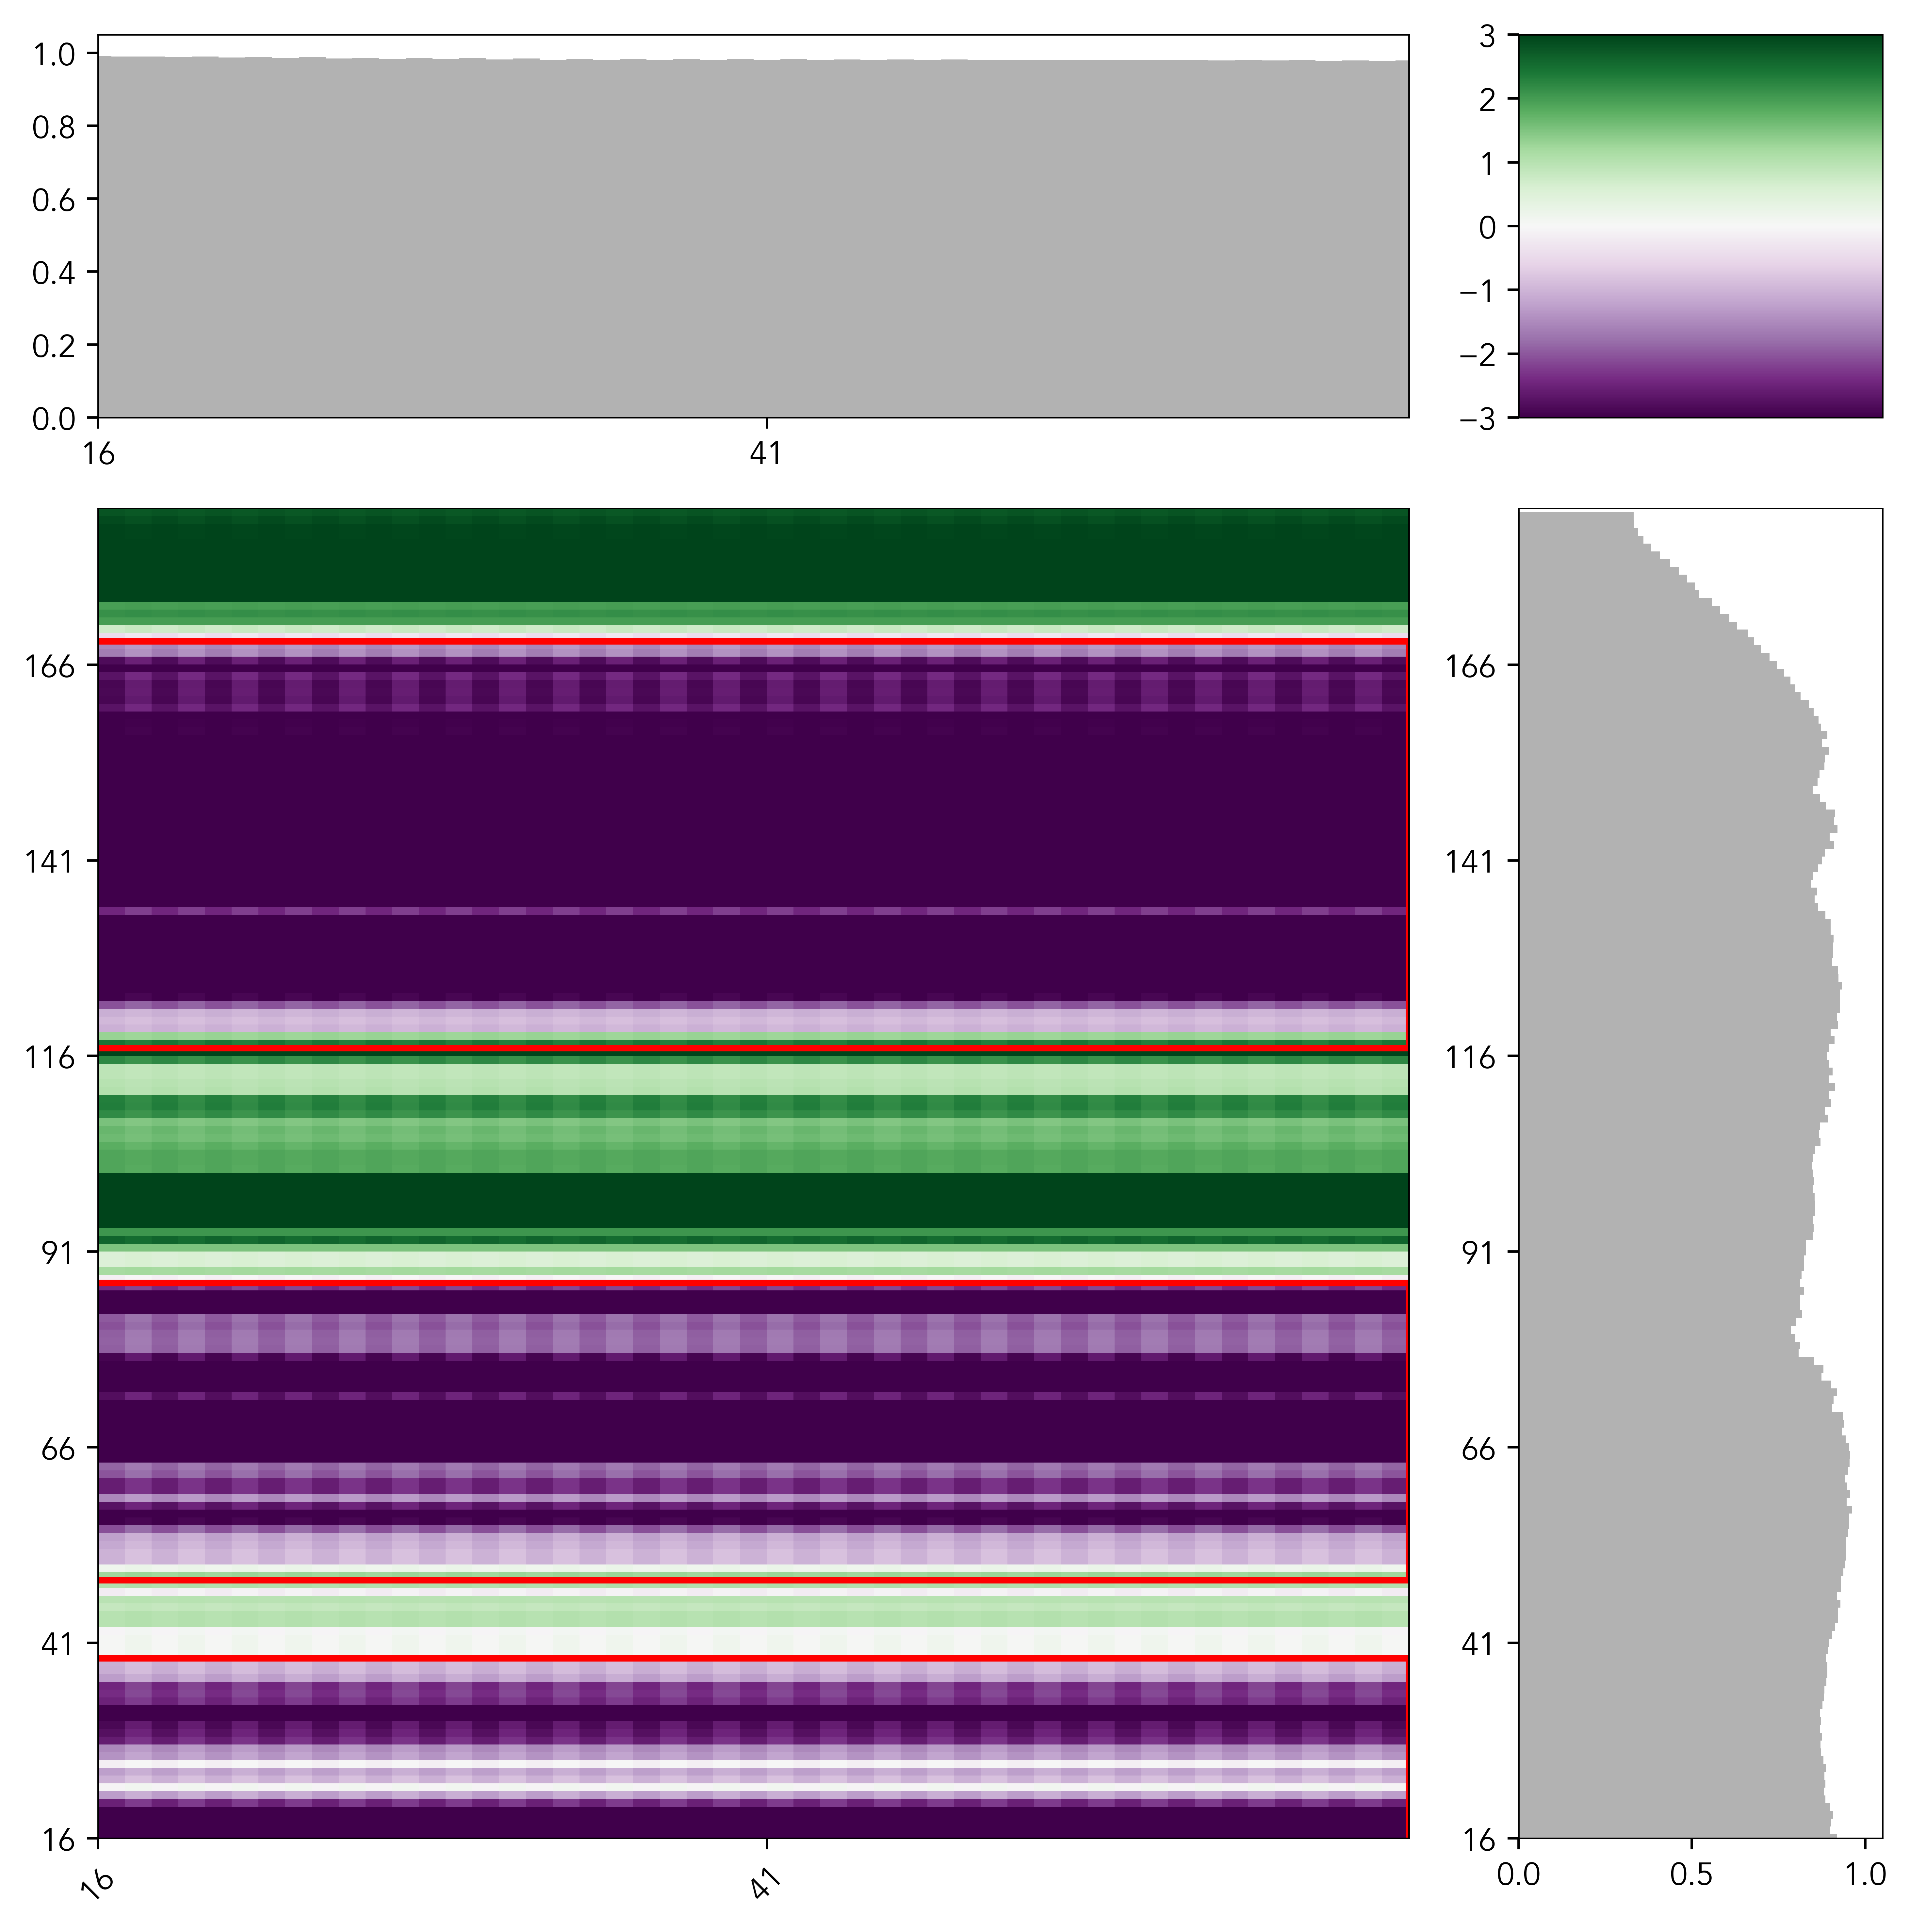

In [7]:
guest = 40*'RG'

special = brca2_sub

[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, guest, special, criteria_threshold=-0.5, criteria='less')

mf.interaction_figure(guest, special, fname='out_figures/brca2_sub_RG.pdf', tic_frequency=25,zero_folded=False, plot_rectangles=[i.rectangle_info 
                                                                                                                             for i in interactor_pairs])
for i in interactor_pairs:
    print(f"{i.r2_start}-{i.r2_end} | {i.r2_sequence}")


15-65 | LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL
25-68 | EKDLLDTENKRKKDFLTSENSLPRISSLPKSEKPLNEETVVNKR
15-65 | LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL
96-162 | SSFQGIKKSIFRIRESPKETFNASFSGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGS


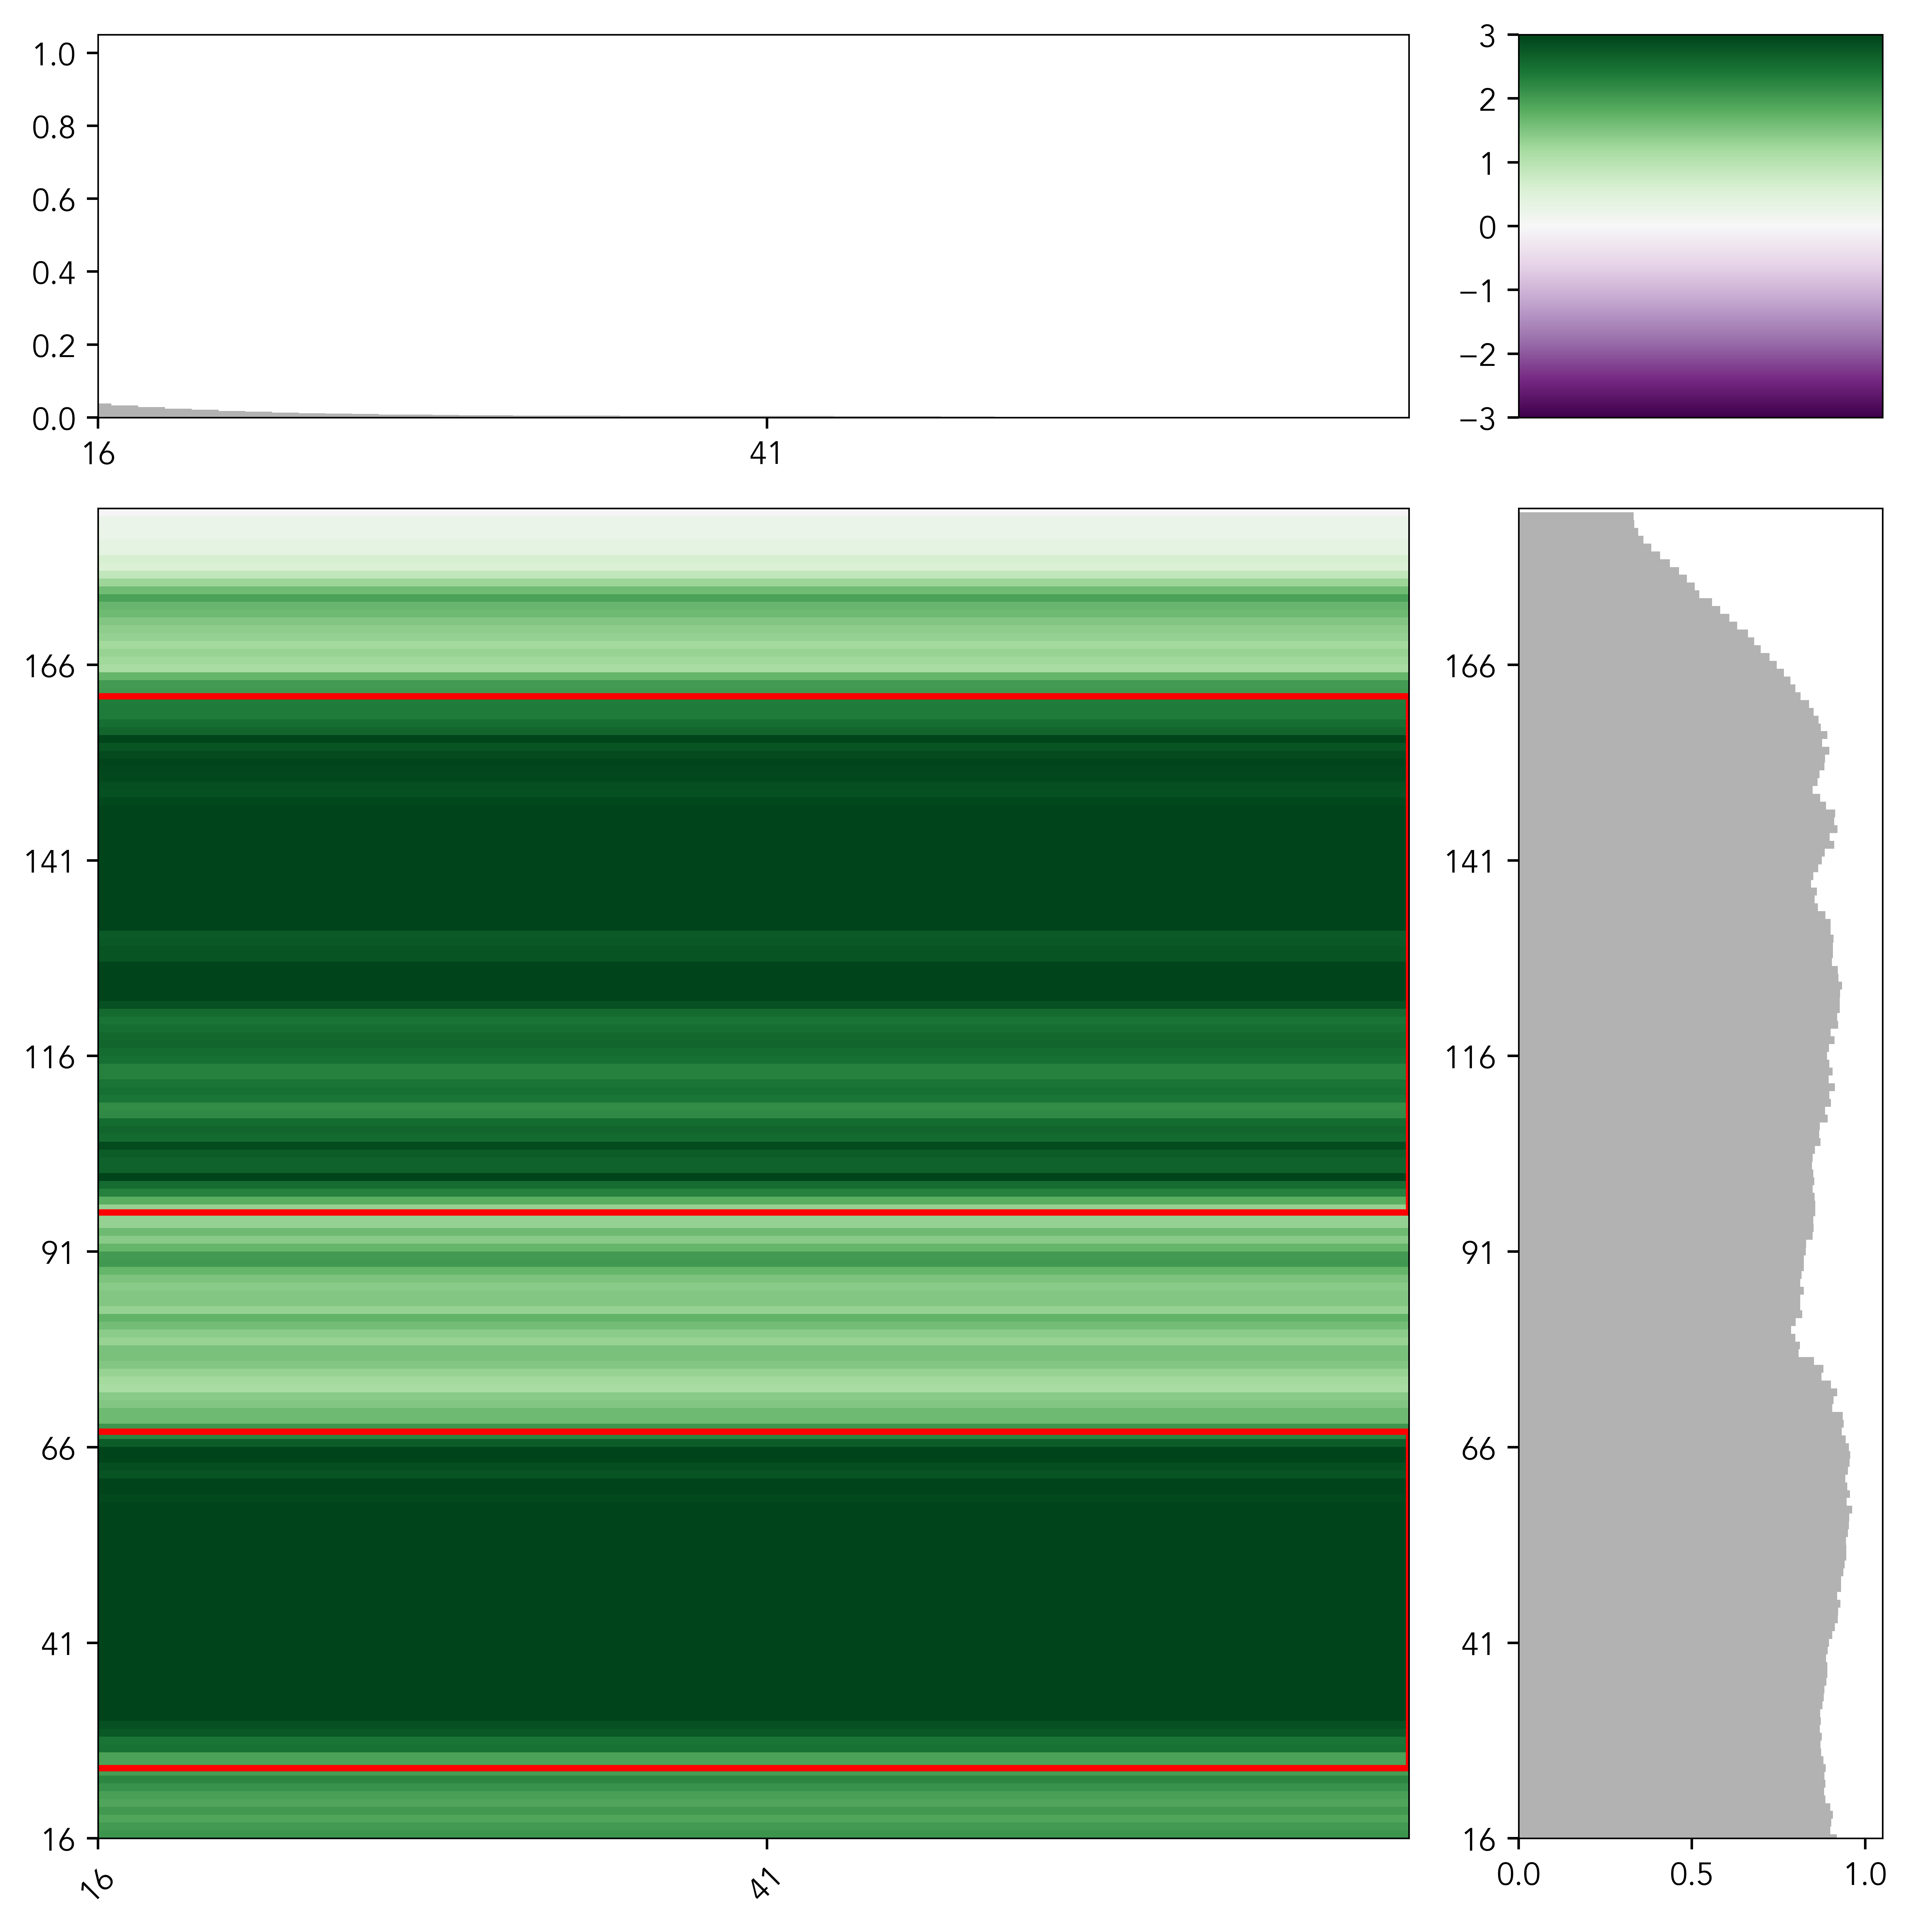

In [8]:
guest = 40*'LL'

[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, guest, brca2_sub, criteria_threshold=2.2, criteria='greater')

mf.interaction_figure(guest, brca2_sub, fname='out_figures/brca2_sub_LL.pdf', tic_frequency=25,zero_folded=False, plot_rectangles=[i.rectangle_info 
                                                                                                                             for i in interactor_pairs])
for i in interactor_pairs:
    print(f"{i.r1_start}-{i.r1_end} | {i.r1_sequence}")
    print(f"{i.r2_start}-{i.r2_end} | {i.r2_sequence}")


86-119 | QAISGTSPVASSFQGIKKSIFRIRESPKETFNAS


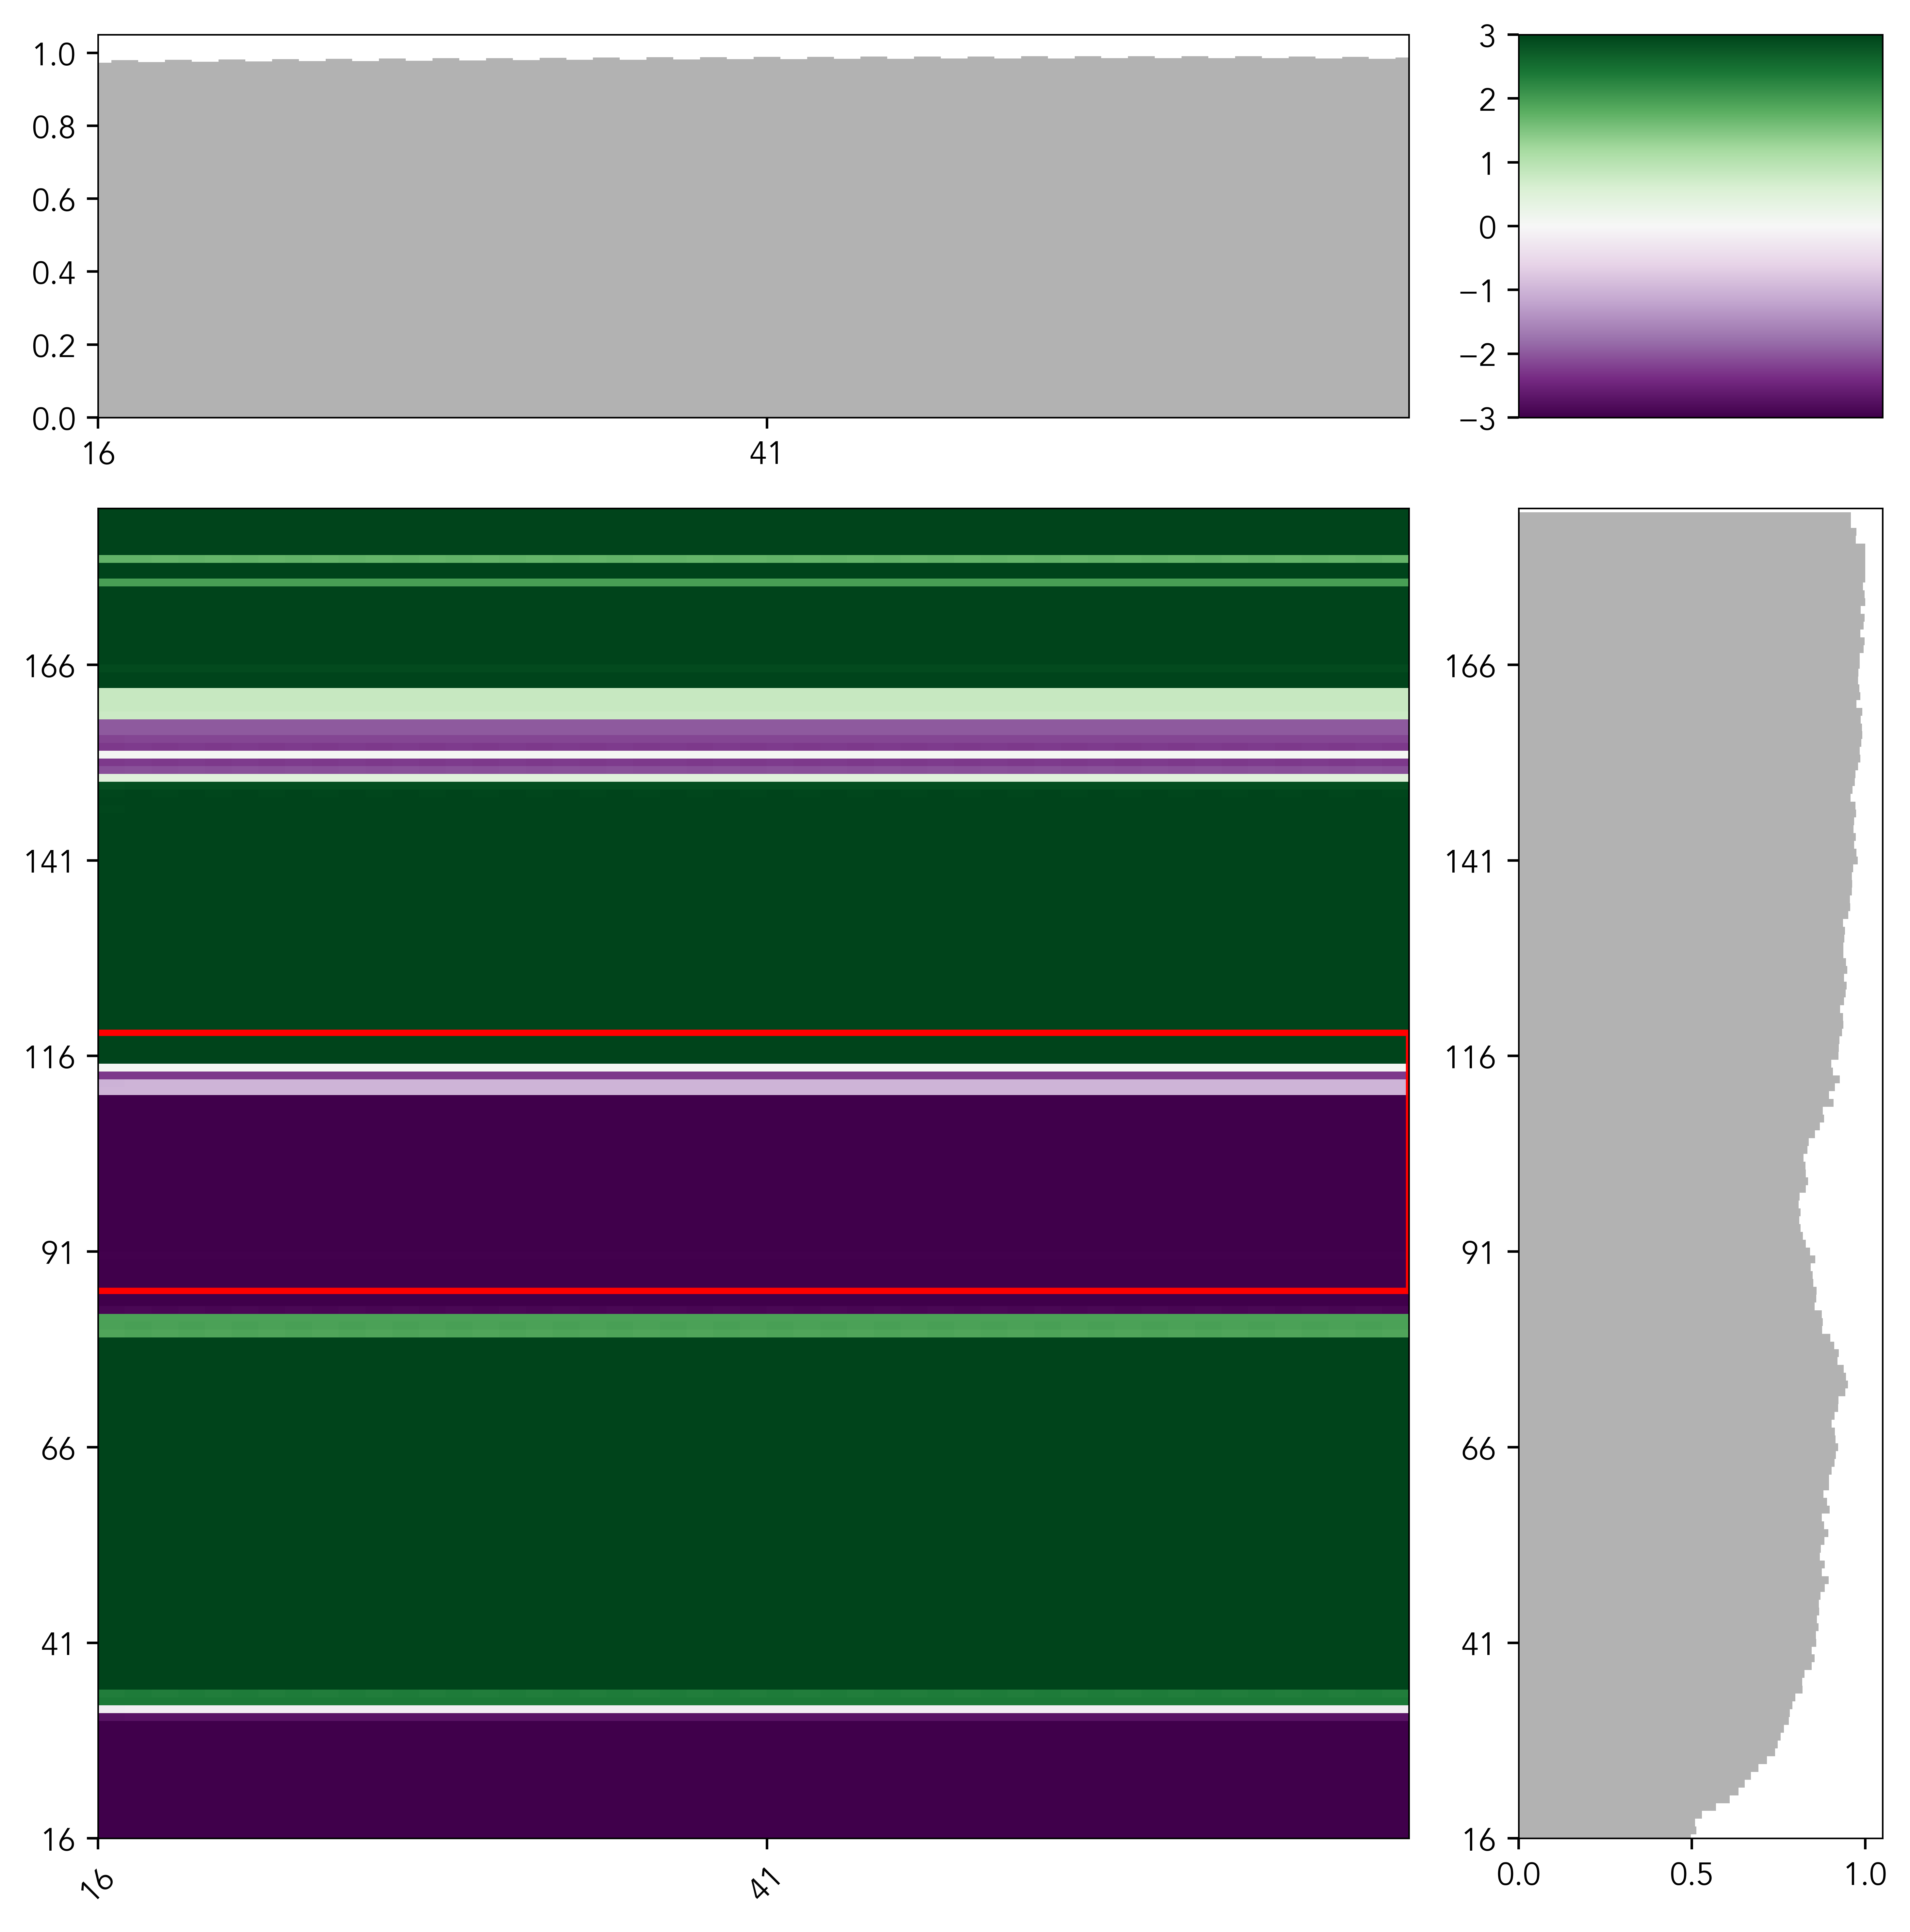

In [9]:
guest = 40*'ED'

[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, guest, brca2_sub, criteria_threshold=-0.5, criteria='less')

mf.interaction_figure(guest, brca2_sub[::-1], fname='out_figures/brca2_sub_ED_attractive.pdf', tic_frequency=25,zero_folded=False, plot_rectangles=[i.rectangle_info 
                                                                                                                             for i in interactor_pairs])
for i in interactor_pairs:
    print(f"{i.r2_start}-{i.r2_end} | {i.r2_sequence}")


15-43 | HISSCDQNISEKDLLDTENKRKKDFLTSE
49-87 | ISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQA
117-169 | NASFSGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPATTTQ


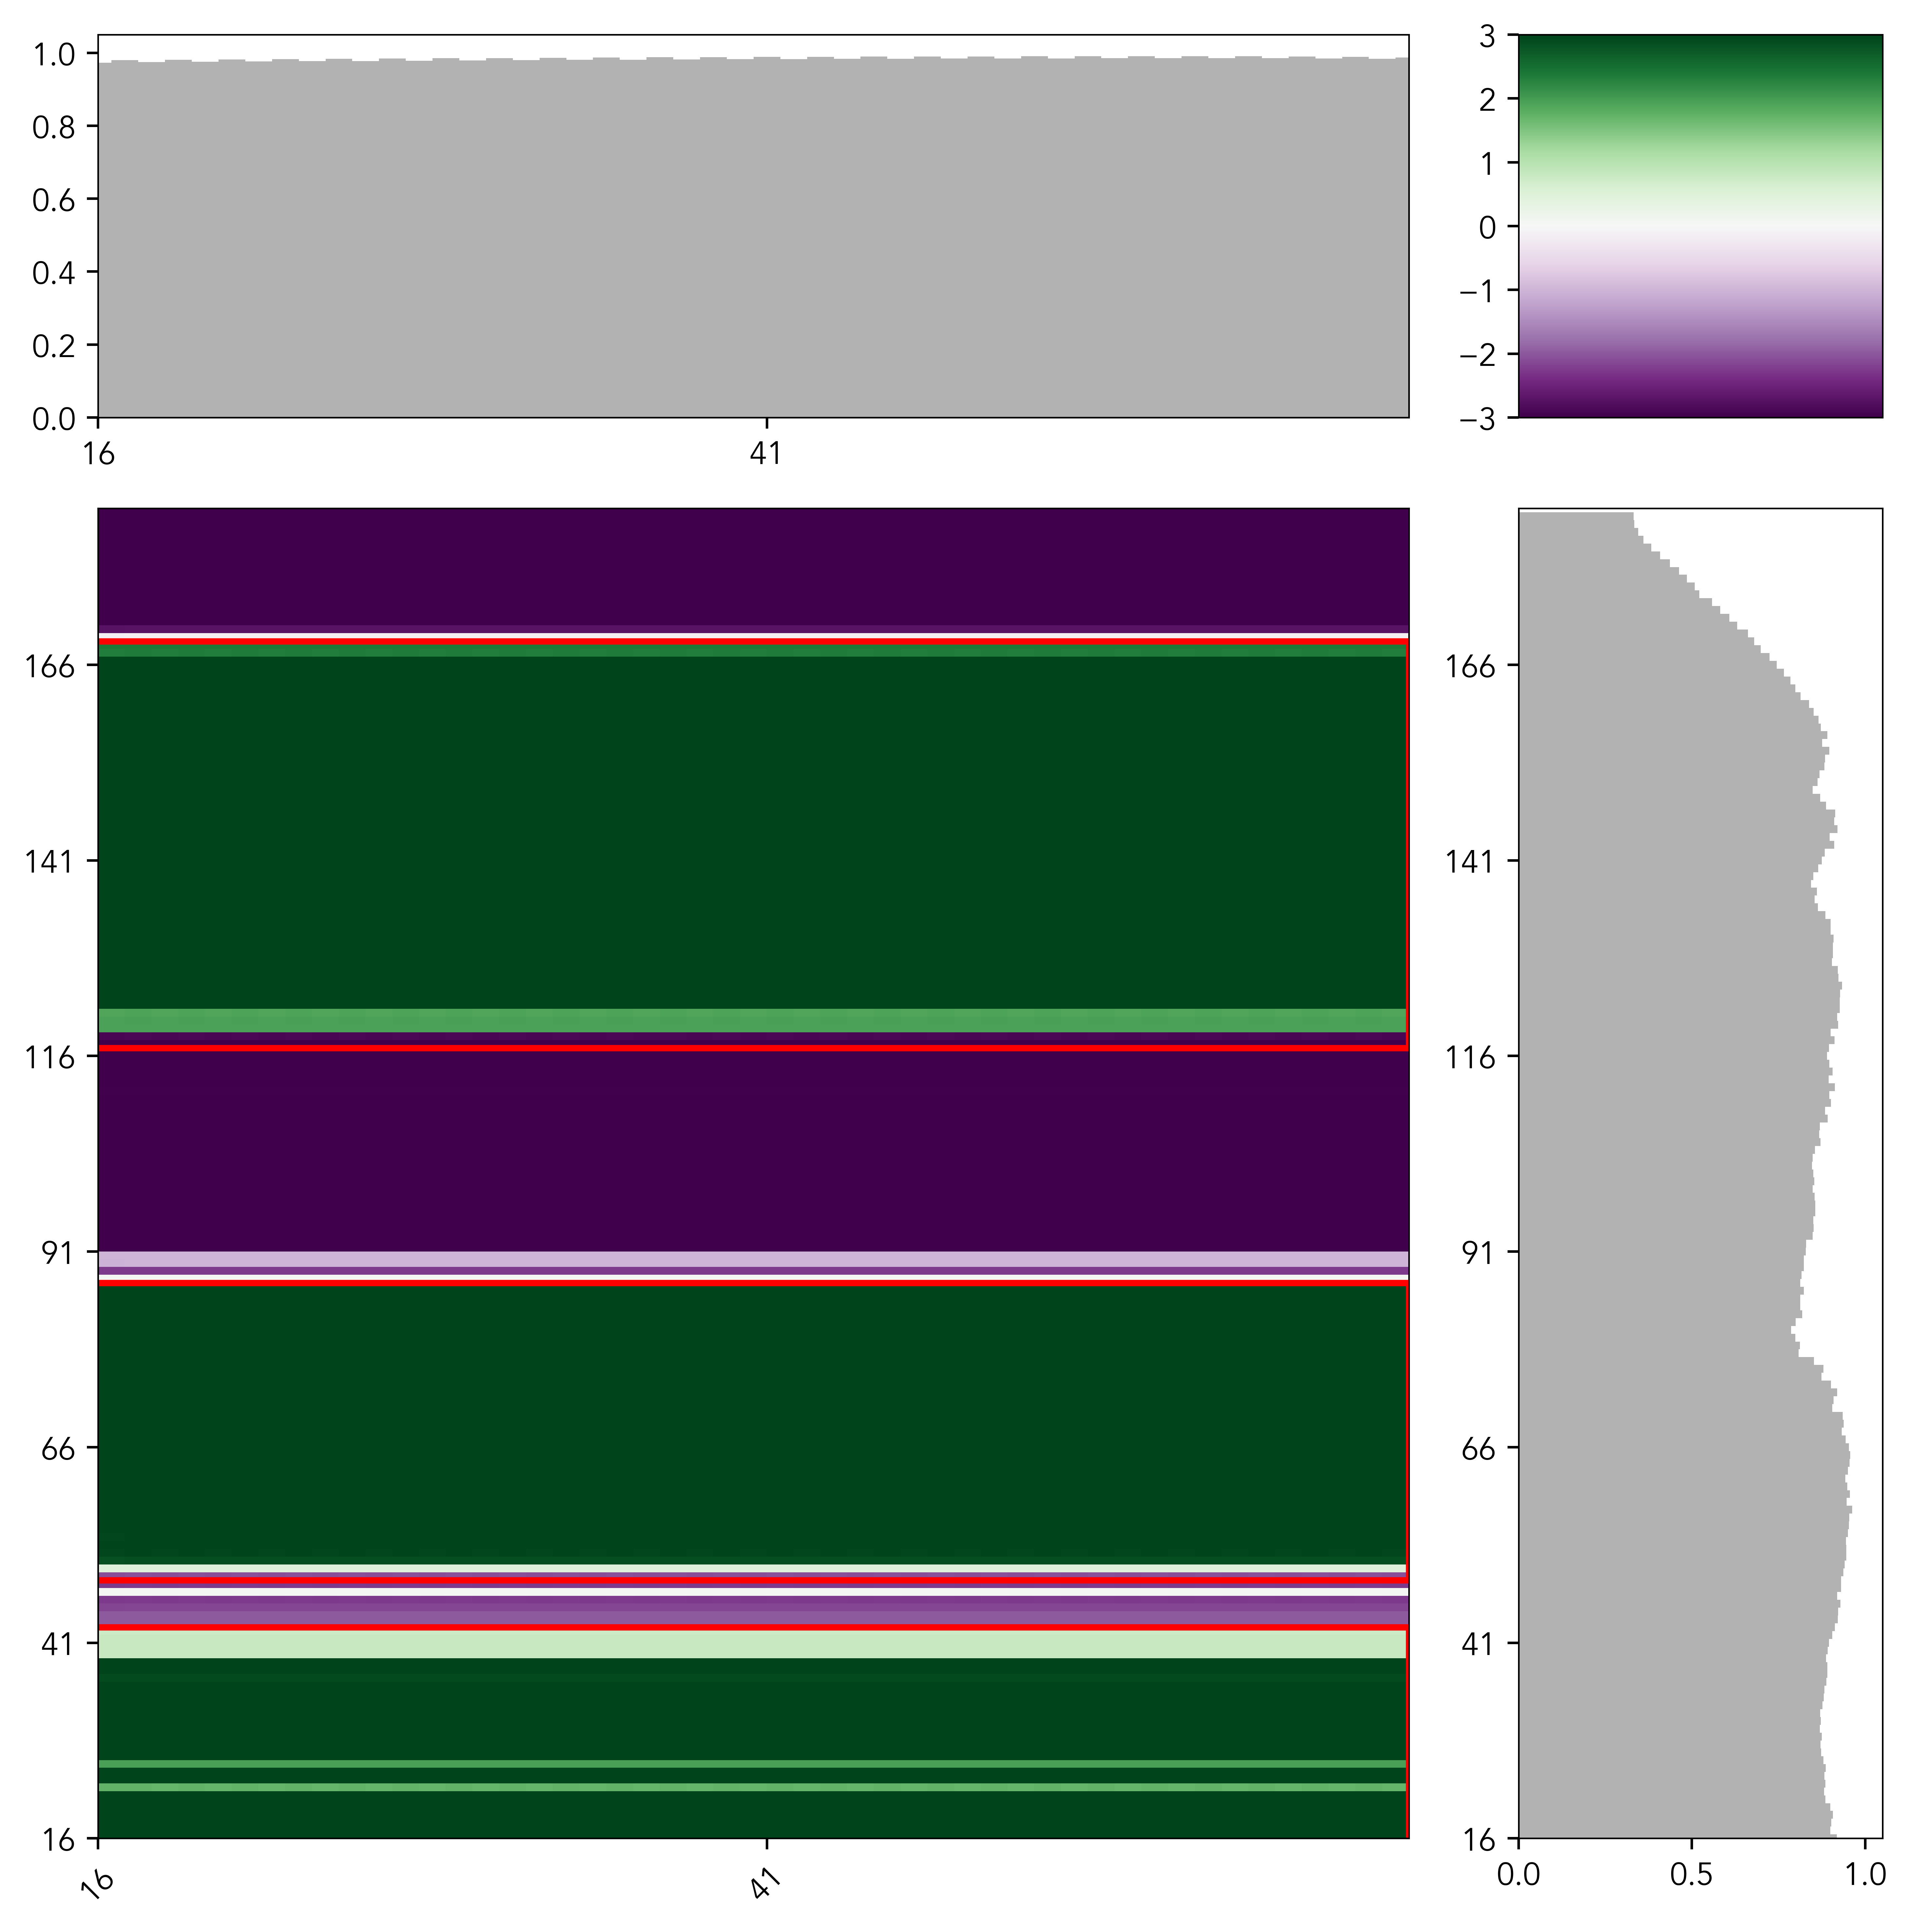

In [11]:
guest = 40*'ED'

[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, guest, brca2_sub, criteria_threshold=0.5, criteria='greater')

mf.interaction_figure(guest, brca2_sub, fname='out_figures/brca2_sub_ED_repulsive.pdf', tic_frequency=25,zero_folded=False, plot_rectangles=[i.rectangle_info 
                                                                                                                             for i in interactor_pairs])
for i in interactor_pairs:
    print(f"{i.r2_start}-{i.r2_end} | {i.r2_sequence}")


## Fig. S10A
Code below generates Fig. S10A

IDR: 1-2556
IDR: 2699-2711
IDR: 3193-3418


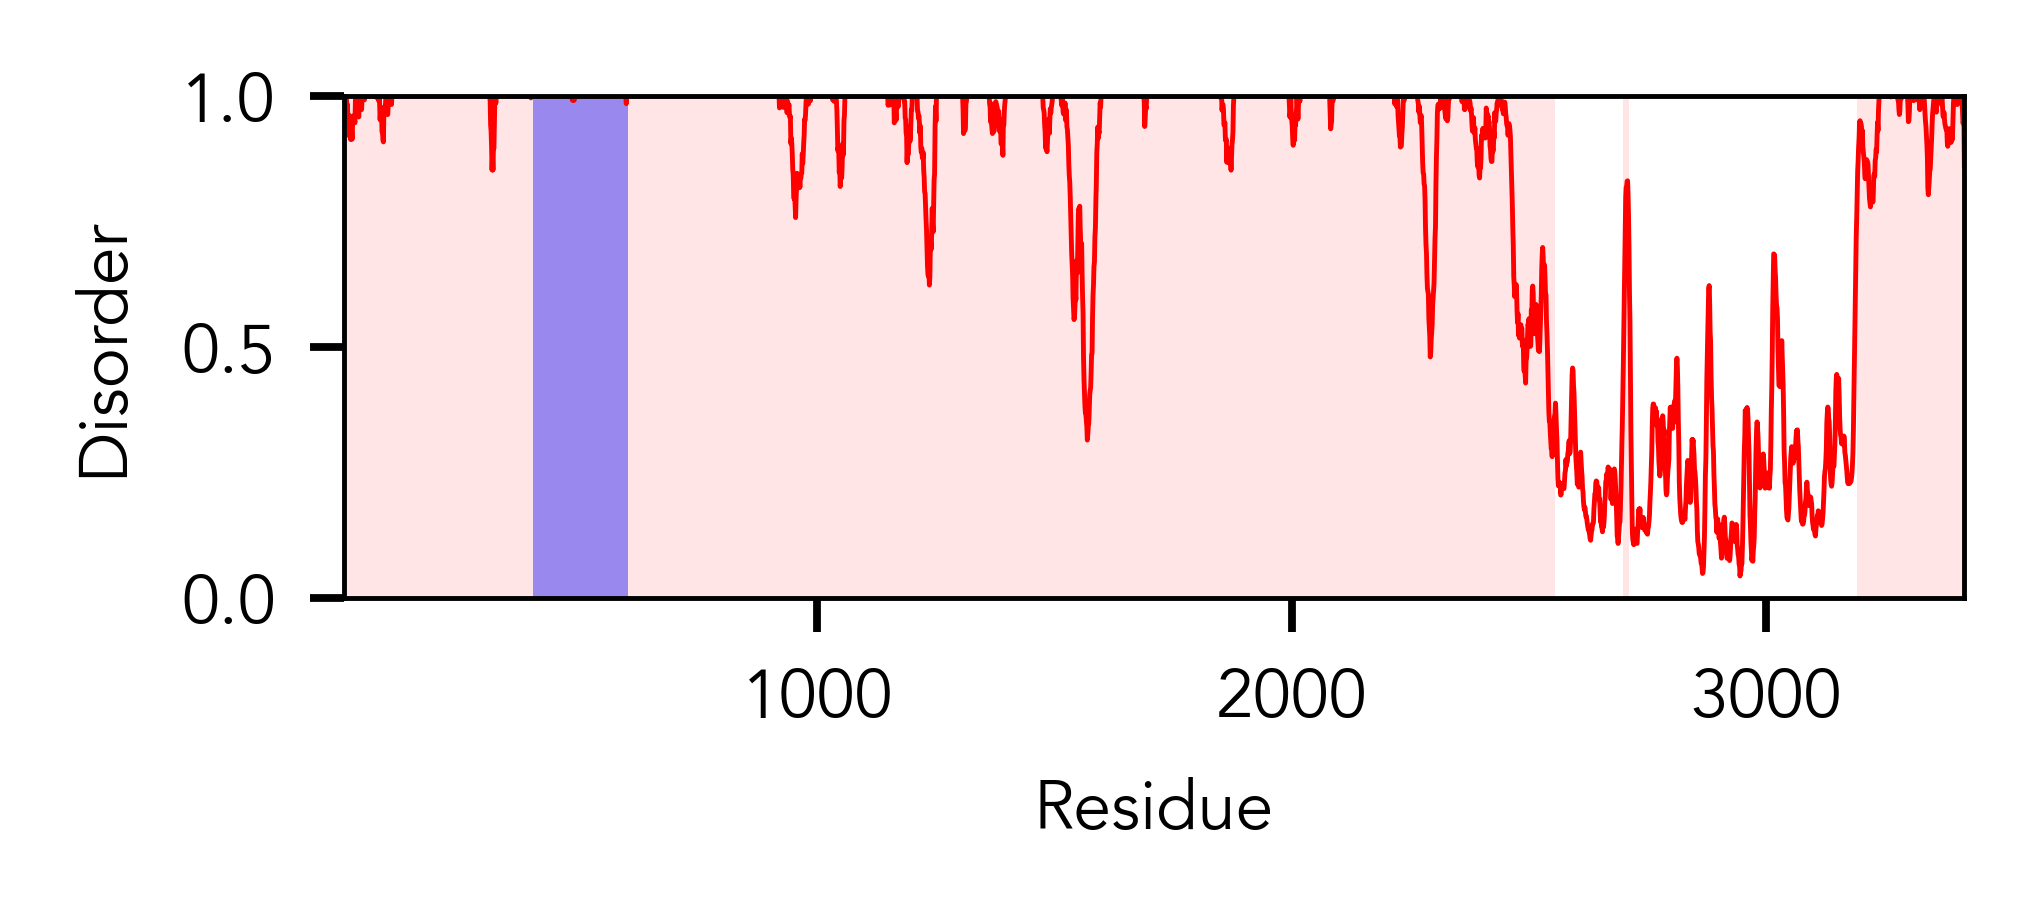

In [14]:
figure(None, (3,1.4), dpi=350)
ax = plt.gca()
seq = brca2
idx = np.arange(1,len(seq)+1)
plt.plot(idx, meta.predict_disorder(seq,version=2), color='r', lw=0.5)
doms = meta.predict_disorder_domains(seq)
for d in doms.disordered_domain_boundaries:
    print(f"IDR: {d[0]+1}-{d[1]}")
    ax.axvspan(d[0],d[1],lw=0, color='r', alpha=0.1)

ax.axvspan(400,600,color='b',lw=0,alpha=0.4)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Residue',fontsize=7)
plt.ylabel('Disorder',fontsize=7)
plt.ylim([0,1])
plt.xlim([1,idx[-1]])
plt.tight_layout()
plt.savefig('out_figures/disorder_brca2.pdf')

## Fig. S10B
Code below generates Fig. S10B

15-101 | HISSCDQNISEKDLLDTENKRKKDFLTSENSLPRISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQAISGTSPVASSFQGI
121-166 | SGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPAT
121-166 | SGHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPAT
15-42 | HISSCDQNISEKDLLDTENKRKKDFLTS
48-91 | RISSLPKSEKPLNEETVVNKRDEEQHLESHTDCILAVKQAISGT
122-167 | GHMTDPNFKKETEASESGLEIHTVCSQKEDSLCPNLIDNGSWPATT


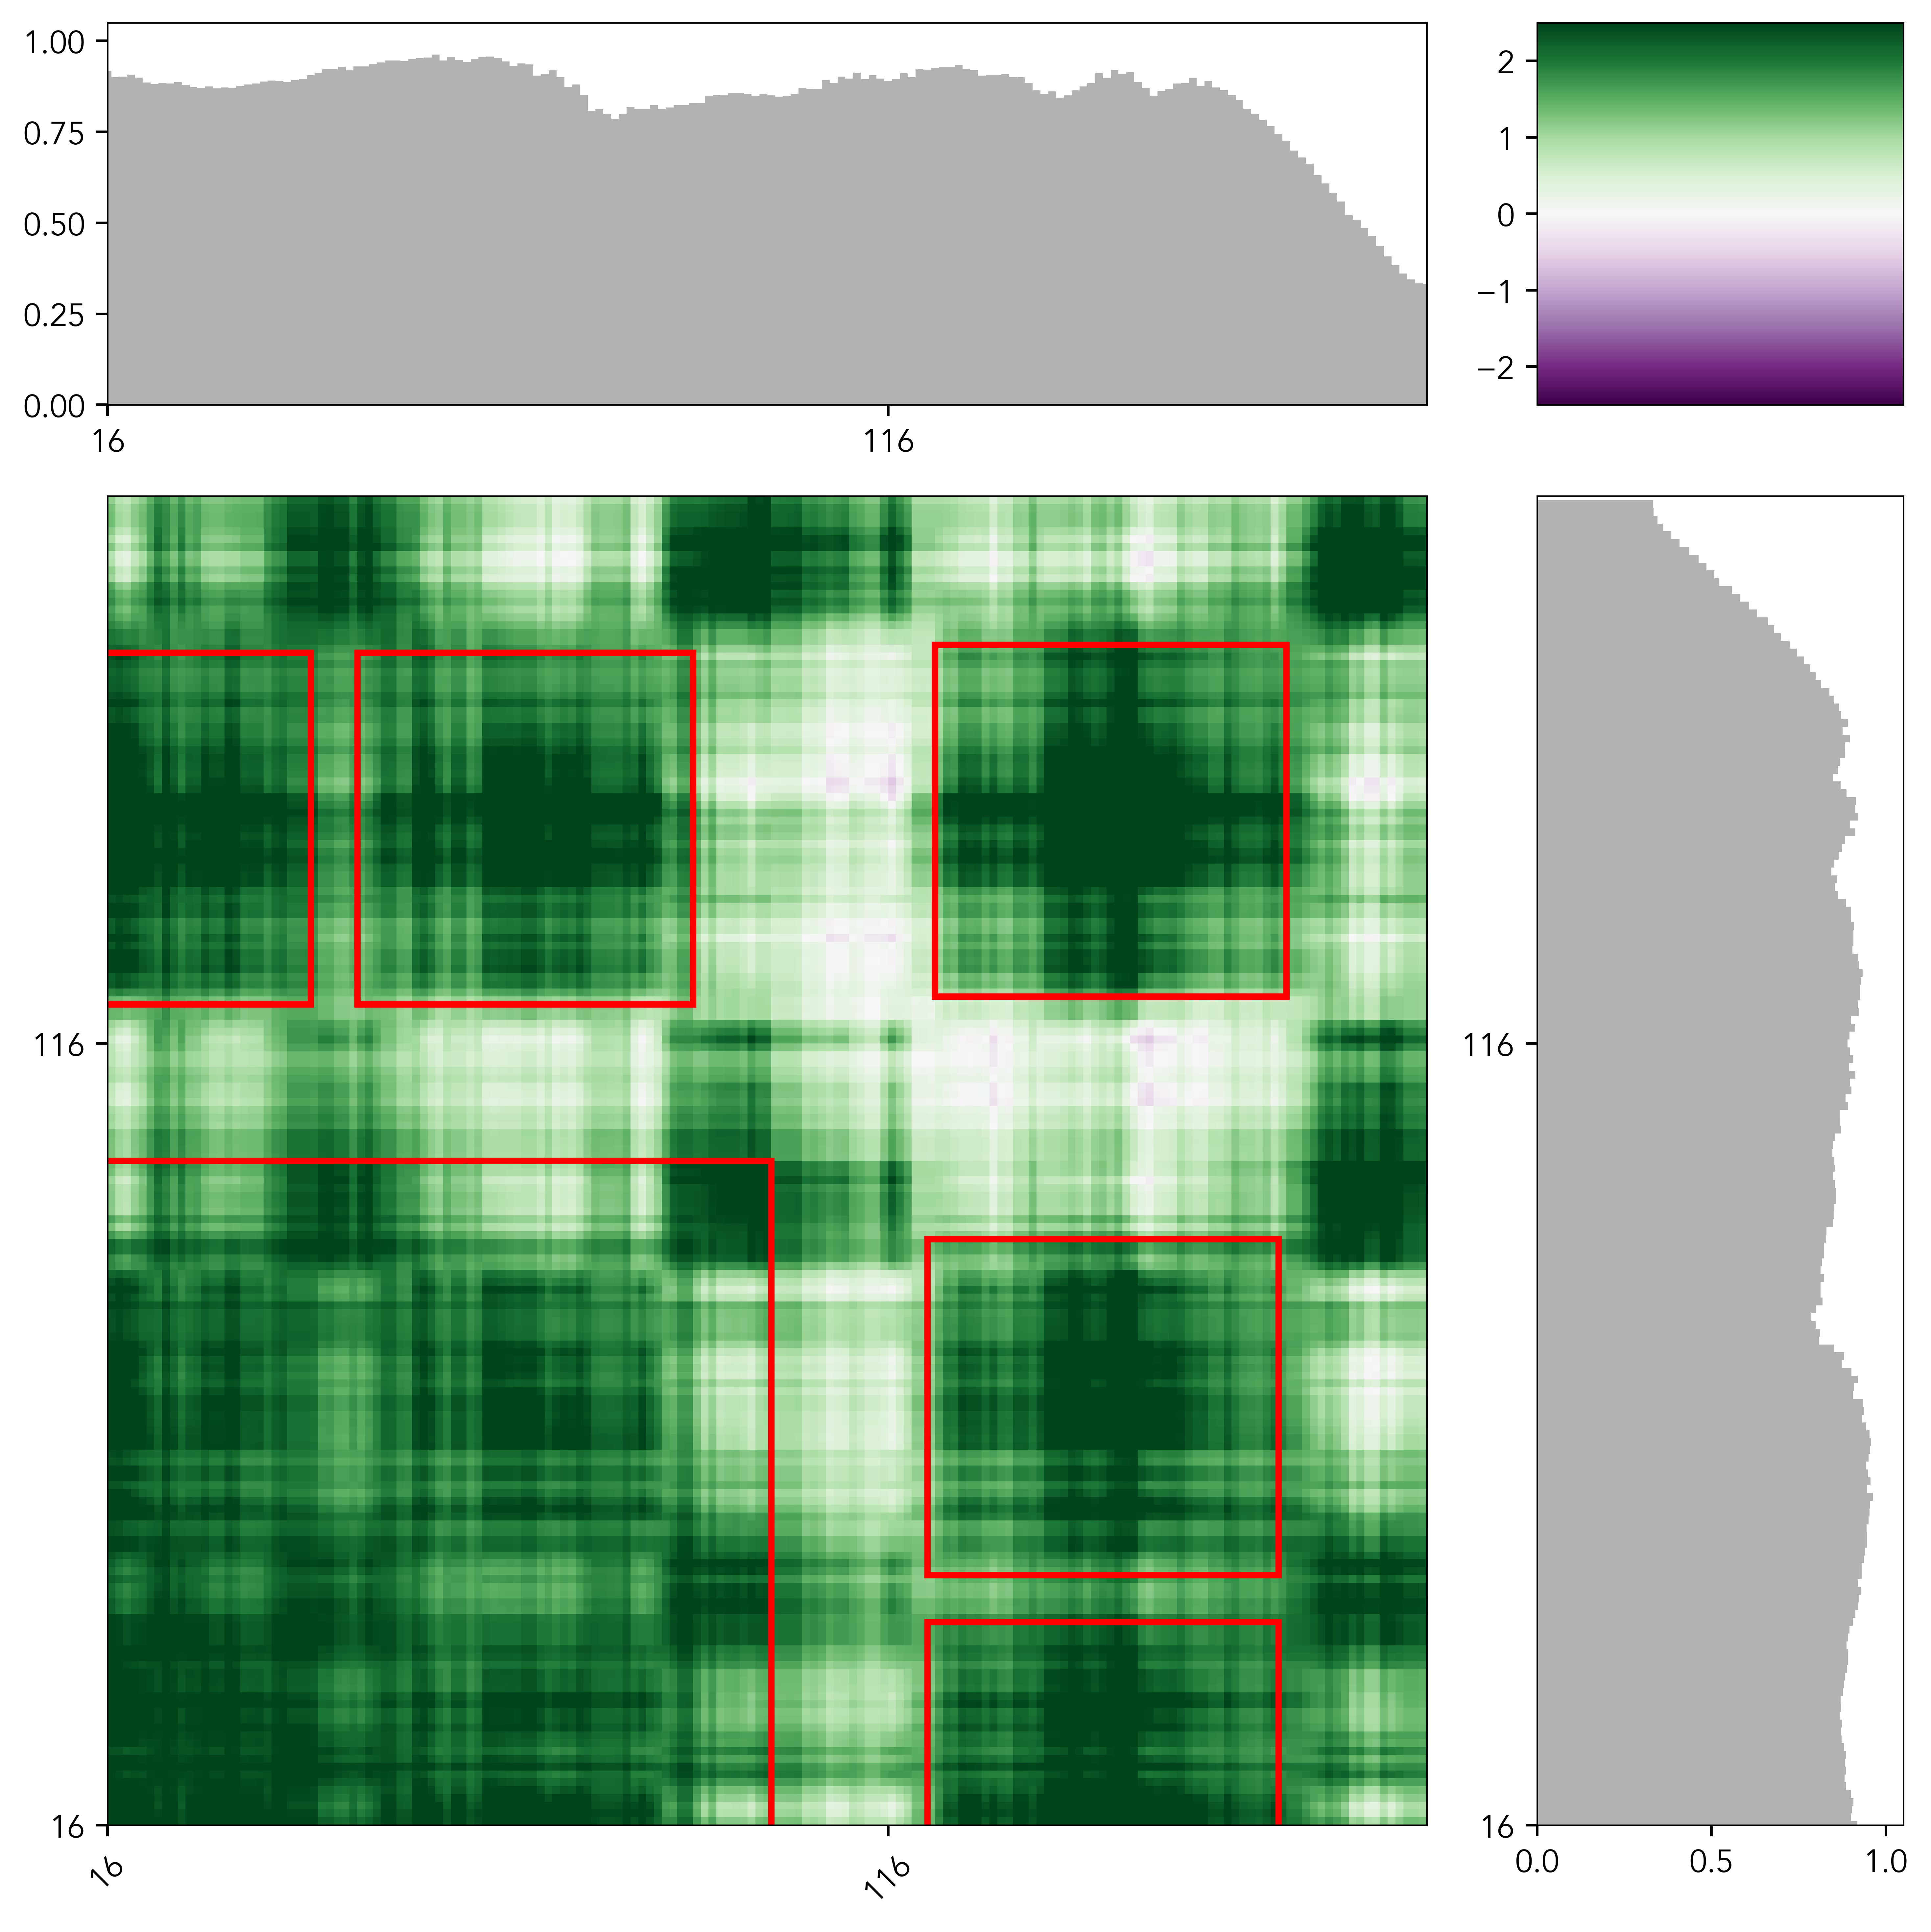

In [13]:
# note this assumes the earlir brca2 cells have been executed to generate the brca2_sub variable
[interactor_pairs, regions, intermap]  = domain_analysis.extract_regions(mf, brca2_sub, brca2_sub, criteria_threshold=2.2, criteria='greater', min_region_area=200)
mf.interaction_figure(brca2_sub, brca2_sub, plot_rectangles=[i.rectangle_info for i in interactor_pairs],zero_folded=False, vmin=-2.5, vmax=2.5, fname='out_figures/brca_400_600_self.pdf')

for i in interactor_pairs:
    print(f"{i.r2_start}-{i.r2_end} | {i.r2_sequence}")